# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 12.10.2024

Мягкий дедлайн: 23:59MSK 27.10.2024

Жесткий дедлайн: 23:59MSK 31.10.2024

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

In [684]:
!pip install folium

In [685]:
import folium

m = folium.Map(location=(50.97178, 9.79418), zoom_start=15)

m

Если вы всё сделали правильно, то выше должна открыться карта

### 📌 **Памятка по дз2**

Обрабатывать данные можно любым способом (`polars`, `pandas`, `pyspark`, ...), который вам нравится и запускается в ноутбуке, и любой библиотекой для визуализации (`matplotlib`, `seaborn`, `plotly`, ...). Пользуйтесь на здоровье, но!

> Учтите, что `polars` всё ещё молодой и не все библиотеки его поддерживают. `sklearn` во многом уже работает, но на всякий случай не стесняйтесь пользоваться методами `pl.DataFrame.to_pandas()` или `pl.DataFrame.to_numpy()`    

> Впрочем, `pandas` тоже не лишён проблем. `sklearn` принимает `pd.DataFrame` почти везде, проблемы очень редки, но если вдруг возникнет какая-то беда с шейпами, или ещё какой-нибудь казус, а вы уверены, что всё правильно, пользуйтесь `pd.DataFrame.to_numpy()`. Это не всегда решает проблему, но часто помогает понять, что на самом деле не так. При желании можно передавать и `Iterable`, и sparse-матрицы

> Графики должны быть понятные, читаемые и пр. Консультируйтесь с памяткой из дз1 в задании на график

> Для воспроизводимости результатов не забывайте пользоваться `np.random.seed(...)`, при необходимости чистите мусор `gc.collect()`, лучше в каждой ячейке

> Все результаты должны быть получены в ноутбуке. На каждый **Вопрос** долен быть дан **Ответ** (письменно (в Markdown например) или кодом)

In [686]:
import numpy as np

import pandas as pd  # your favorite data package
import matplotlib.pyplot as plt
import seaborn as sns # your favorite visualization package

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [687]:
train = pd.read_csv('train.csv')
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [688]:
train = train.drop('dropoff_datetime', axis = 1)

In [689]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

In [690]:
color = sns.color_palette('magma')[0]

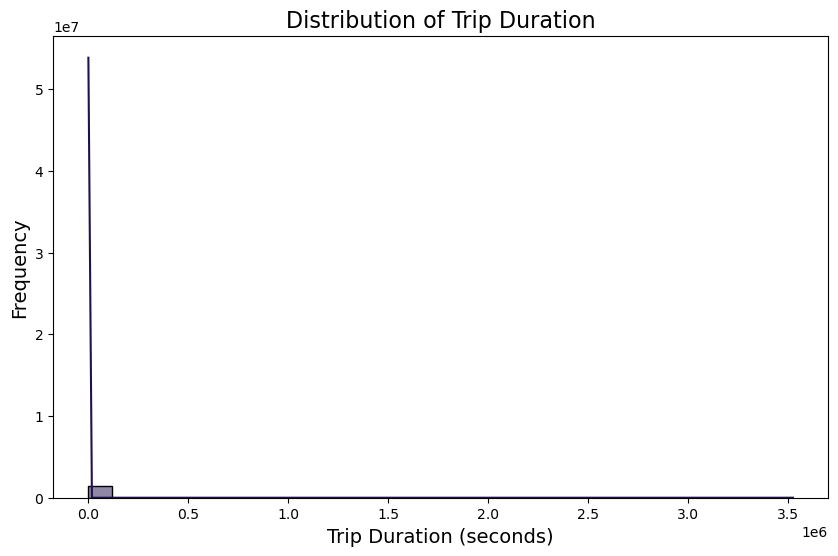

In [691]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(train['trip_duration'], bins=30, kde=True, color = color)  # Adjust bins as necessary

# Add titles and labels
plt.title('Distribution of Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

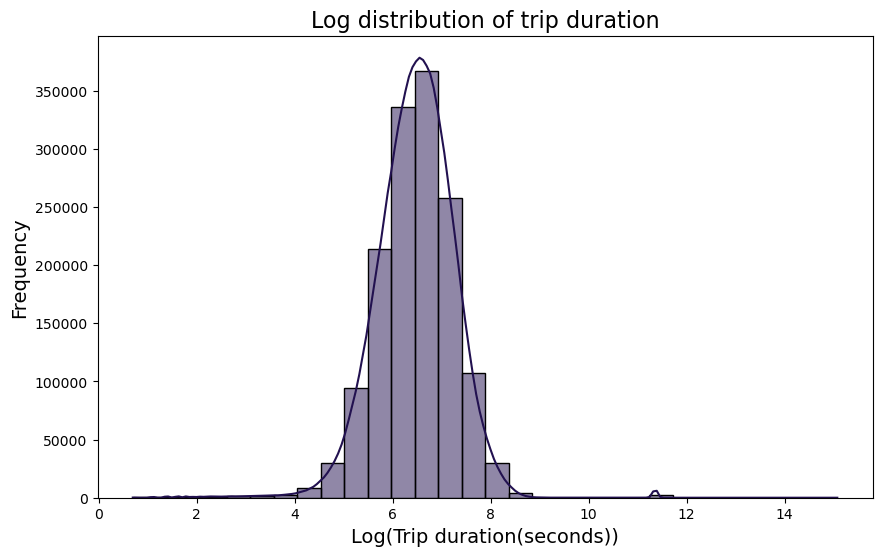

In [692]:
train['log_trip_duration'] = np.log1p(train['trip_duration'])

# Создаем гистограмму
plt.figure(figsize=(10, 6))
sns.histplot(train['log_trip_duration'], bins=30, kde=True, color = color)

# Добавляем заголовки и метки
plt.title('Log distribution of trip duration', fontsize=16)
plt.xlabel('Log(Trip duration(seconds))', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

#### Ответ: 

Я специально сделала логарифмирование переменной еще до того, как прочитала дальнейшие пункты, потому что без логарифмирования таргета будет очень, ОЧЕНЬ тяжело жить. 

Гистограмма показывает максимальную концентрацию вокруг 1 значения, что потенциально может означать

а) какие-то огромные выбросы в правом хвосте (например, таксист счетчик мог не выключить)

б) просто глобальную распространенность коротких поездок со значениями, близкими к нулю. 



В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?



#### Ответ: 

Заметим, что у нас данные с очень неадекватными выбросами справа, что делает распределение таргета крайне асимметричным с длинным хвостом справа. Логарифмирование хорошо помогает в таких случаях, потому что снижает влияение выбросов за счет взятия логарифма, что приближает распределение к более симметричному и похожему на нормальное. 



На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

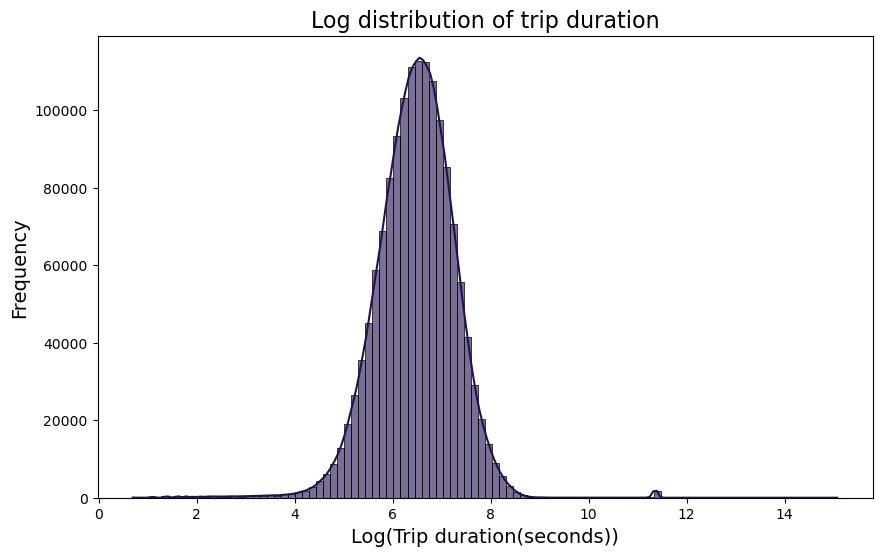

In [693]:

plt.figure(figsize=(10, 6))
color = sns.color_palette('magma')[0]
sns.histplot(train['log_trip_duration'], bins=100, kde=True, alpha = 0.6, color = color)

# Добавляем заголовки и метки
plt.title('Log distribution of trip duration', fontsize=16)
plt.xlabel('Log(Trip duration(seconds))', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()


Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [694]:
#лучшим константным предсказанием будем считать среднее - для распределения, близкого к нормальному, это хорошая метрика для бенчмарка

def rmsle(log1p_y_true, log1p_y_pred): 
    error = (log1p_y_true - log1p_y_pred) ** 2
    return np.sqrt(np.mean(error))
    raise NotImplementedError
best_constant = train['log_trip_duration'].mean()
rmsle_best_const = rmsle(train['log_trip_duration'], best_constant * np.ones(train['log_trip_duration'].shape)) 
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


In [695]:
#Сразу посчитаем метрику, чтобы было проще сравнивать с бенчмарком в будущем
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)
y_train_с = df_train['log_trip_duration']
y_test_с = df_test['log_trip_duration']
mean_prediction = y_train_с.mean()
y_pred_mean = np.full(y_test_с.shape, mean_prediction)
rmlse_mean = np.sqrt(mean_squared_log_error(y_test, y_pred_mean))
rmlse_mean

0.11303205989440142

## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году:

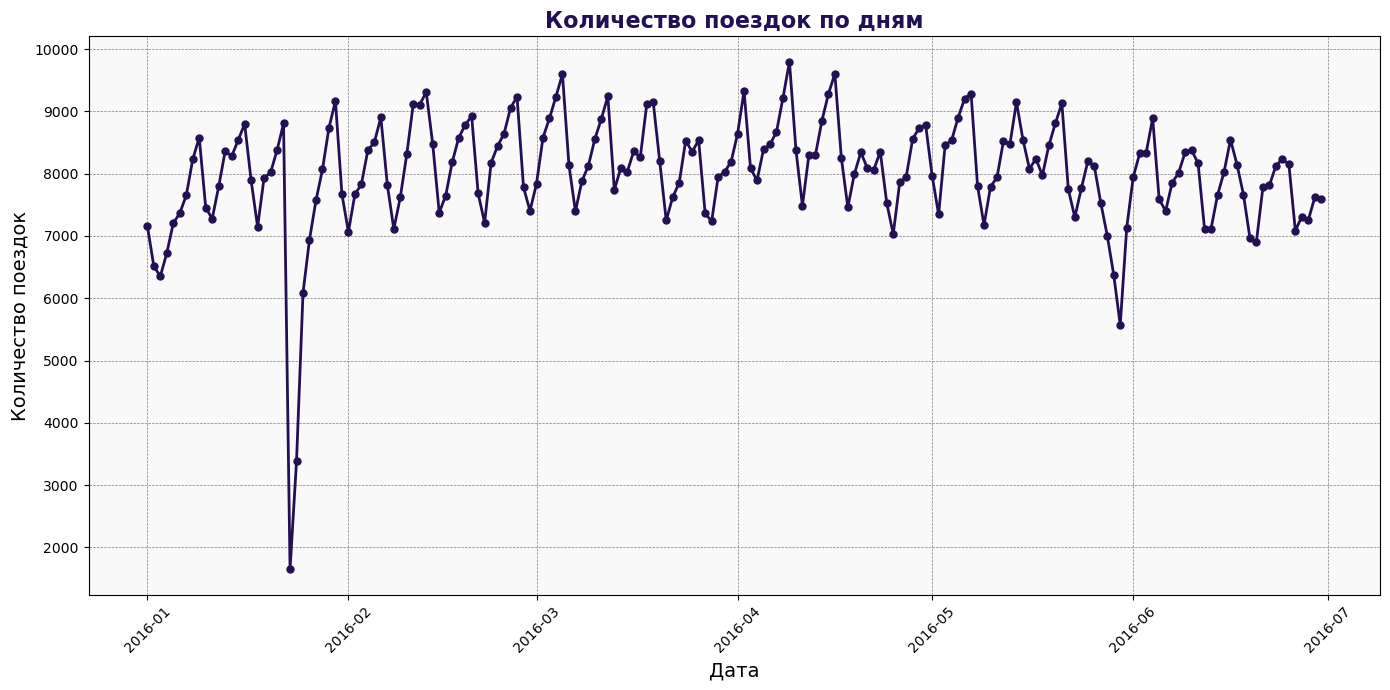

In [696]:
train['dates'] = train['pickup_datetime'].dt.date
daily_rides = train.groupby('dates').size()

daily_rides.index = pd.to_datetime(daily_rides.index)
plt.figure(figsize=(14, 7))
plt.plot(daily_rides.index, daily_rides.values, marker='o', color= color, linestyle='-', linewidth=2, markersize=5)

plt.title('Количество поездок по дням', fontsize=16, fontweight='bold', color= color)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.gca().set_facecolor('#f9f9f9')  # Цвет фона графика
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках:

In [697]:
daily_rides.sort_values()

dates
2016-01-23    1648
2016-01-24    3383
2016-05-30    5570
2016-01-25    6084
2016-01-03    6353
              ... 
2016-02-13    9309
2016-04-02    9325
2016-03-05    9597
2016-04-16    9602
2016-04-09    9796
Length: 182, dtype: int64

#### 23 января 2016 года: 
Губернатор штата Нью-Йорк Эндрю Куомо запретил автомобильное движение в городе Нью-Йорк из-за снежной бури "Джонас", которая накрыла мегаполис в субботу. (https://ria.ru/20160123/1364032228.html)

#### 30 мая 2016: 
Более 1 тыс. пассажиров скопилось в терминале №7 аэропорта имени Джона Кеннеди в Нью-Йорке из-за сбоя компьютерной системы, сообщило в понедельник агентство Associated Press. (https://www.interfax.ru/world/510698)

In [698]:
#График зависимости от дня недели

train['weekday'] = train['pickup_datetime'].dt.day_name()
train['hour'] = train['pickup_datetime'].dt.hour
rides_per_weekday = train.groupby('weekday').size()


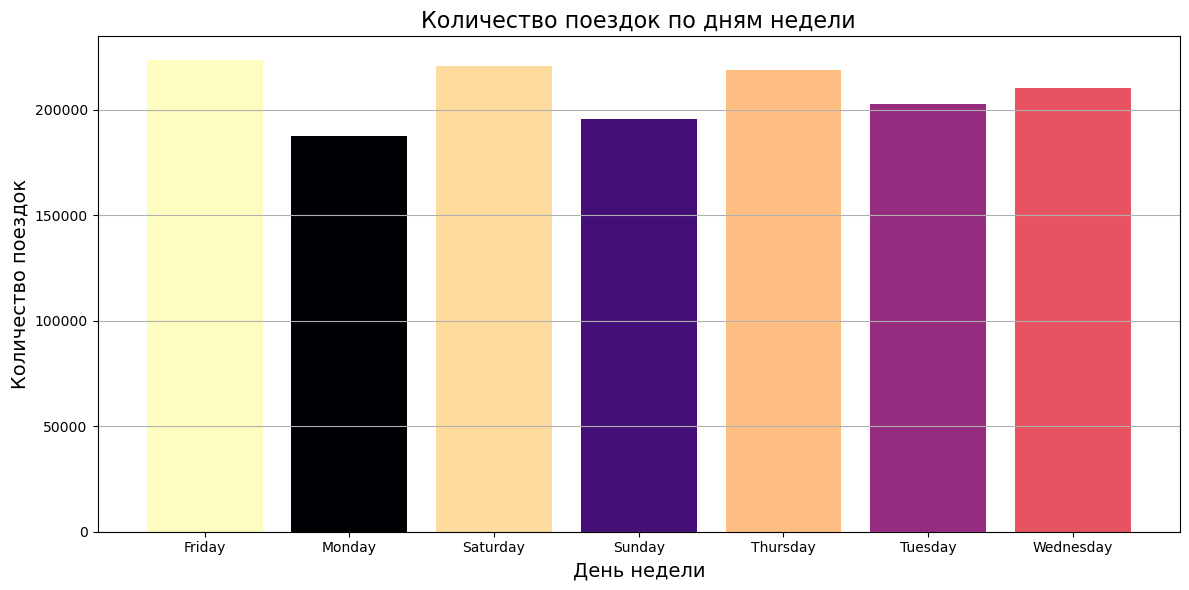

In [699]:
cmap = plt.cm.get_cmap('magma')

norm = plt.Normalize(min(rides_per_weekday), max(rides_per_weekday))
colors = cmap(norm(rides_per_weekday))

plt.figure(figsize=(12, 6))
plt.bar(rides_per_weekday.index, rides_per_weekday, color=colors)
plt.title('Количество поездок по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

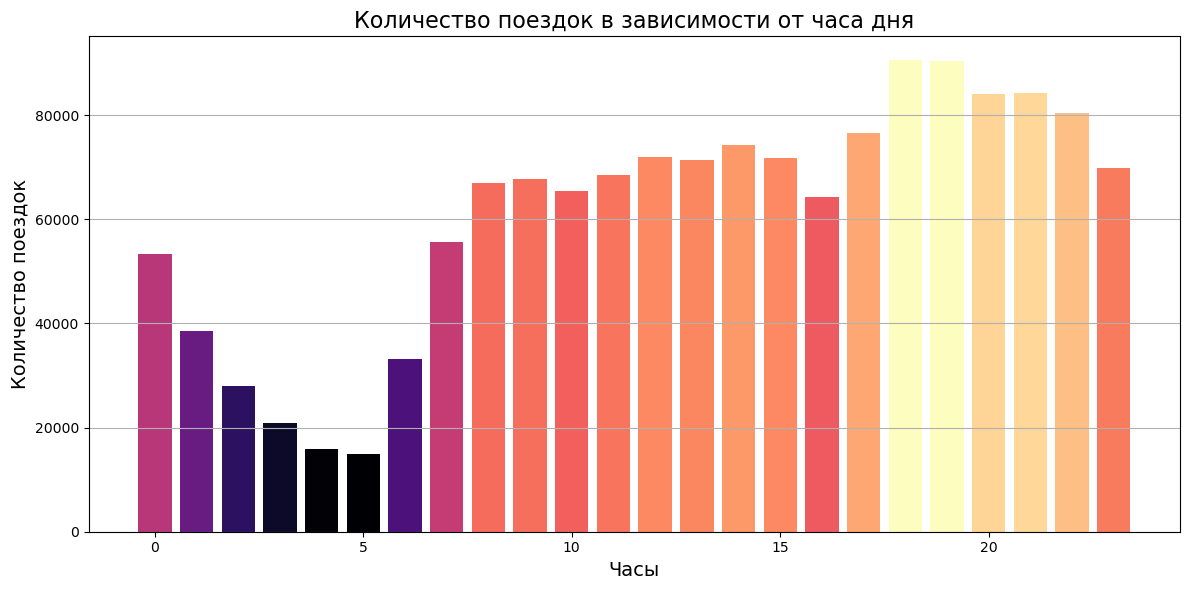

In [700]:
#График зависимости от времени суток 
rides_per_hour = train.groupby('hour').size()
cmap = plt.cm.get_cmap('magma')

norm = plt.Normalize(min(rides_per_hour), max(rides_per_hour))
colors = cmap(norm(rides_per_hour))

plt.figure(figsize=(12, 6))
plt.bar(rides_per_hour.index, rides_per_hour, color=colors)
plt.title('Количество поездок в зависимости от часа дня', fontsize=16)
plt.xlabel('Часы', fontsize=14)
plt.ylabel('Количество поездок', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, поищите, как это делается). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

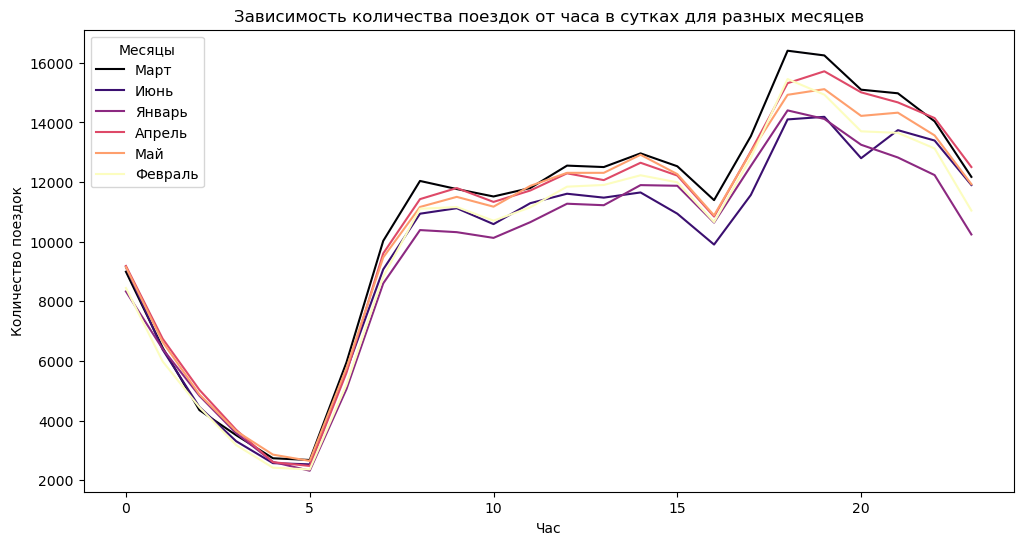

In [701]:
#График для месяцев

train['hour'] = train['pickup_datetime'].dt.hour
train['month'] = train['pickup_datetime'].dt.month


month_names = [
    "Январь", "Февраль", "Март", "Апрель", "Май", "Июнь",
    "Июль", "Август", "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"
]

fig, ax1 = plt.subplots(figsize=(12, 6))

months = train['month'].unique()
colors = plt.cm.get_cmap('magma', len(months))  

for i, month in enumerate(months):
    month_data = train[train['month'] == month]
    hourly_trips = month_data.groupby('hour')['hour'].count() 
    ax1.plot(hourly_trips.index, hourly_trips.values, label=month_names[month - 1], color=colors(i))

ax1.set_xlabel('Час')
ax1.set_ylabel('Количество поездок')
ax1.set_title('Зависимость количества поездок от часа в сутках для разных месяцев')
ax1.legend(title="Месяцы")

plt.show()


In [702]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,dates,weekday,hour,month
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,Monday,17,3
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,Sunday,0,6
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,Tuesday,11,1
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,Wednesday,19,4
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,Saturday,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,2016-04-08,Friday,13,4
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,2016-01-10,Sunday,7,1
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,2016-04-22,Friday,6,4
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,2016-01-05,Tuesday,15,1


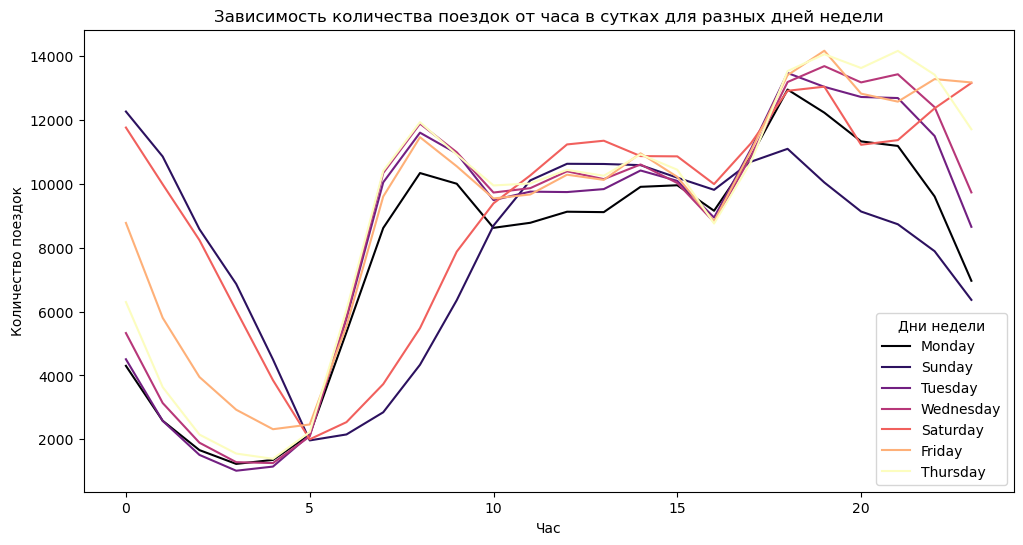

In [703]:
train['weekday'] = train['pickup_datetime'].dt.day_name()
fig, ax1 = plt.subplots(figsize=(12, 6))

weekdays = train['weekday'].unique()
colors = plt.cm.get_cmap('magma', len(weekdays)) 

for i, weekday in enumerate(weekdays):
    day_data = train[train['weekday'] == weekday]
    hourly_trips = day_data.groupby('hour')['hour'].count() 
    ax1.plot(hourly_trips.index, hourly_trips.values, color=colors(i))

ax1.set_xlabel('Час')
ax1.set_ylabel('Количество поездок')
ax1.set_title('Зависимость количества поездок от часа в сутках для разных дней недели')

ax1.legend(weekdays, title="Дни недели")

plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

**Ответ**: В днях недели в среднем нет каких-то крайне значимых зависимостей, кроме того, что количество поездок постепенно растет, достигая пика в пятницу (что логично, потому что это начало выходных, на вечер которых приходится большая часть поездок из-за закрытого метро)

Часы дня влияют на количество поездок значительно: пик количества поездок достигается в часы после работы (18-20 часов), минимум - с 12 часов до 6 утра, что логично - в это время обычно люди никуда не ездят. 

* Анализ по месяцам:

В течение всего года, как правило, общая динамика поведения потребителей по часам сохраняется с небольшими отклонениями. Чаще всего услугами такси пользуются в марте, в то время как в июне в вечерние часы спрос на такси ниже, чем в остальные месяцы, что, вероятно, связано с климатическими условиями и удлинением продолжительности светового дня. 

* Анализ по дням недели: 

Очевидно, что в воскресенье и субботу спрос на услуги такси ранним утром сильно меньше, чем в будни, потому что людям не нужно ехать на работу. При этом в воскресенье спрос на поездки вечером сильно ниже, чем обычно, потому что это последний выходной день перед рабочей неделей, что скорее удерживает людей дома по вечерам. При этом в ранние утренние часы (до 5 утра) спрос на такси в выходные больше, потому что люди могут предпочитать проводить время вне дома по ночам.

**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

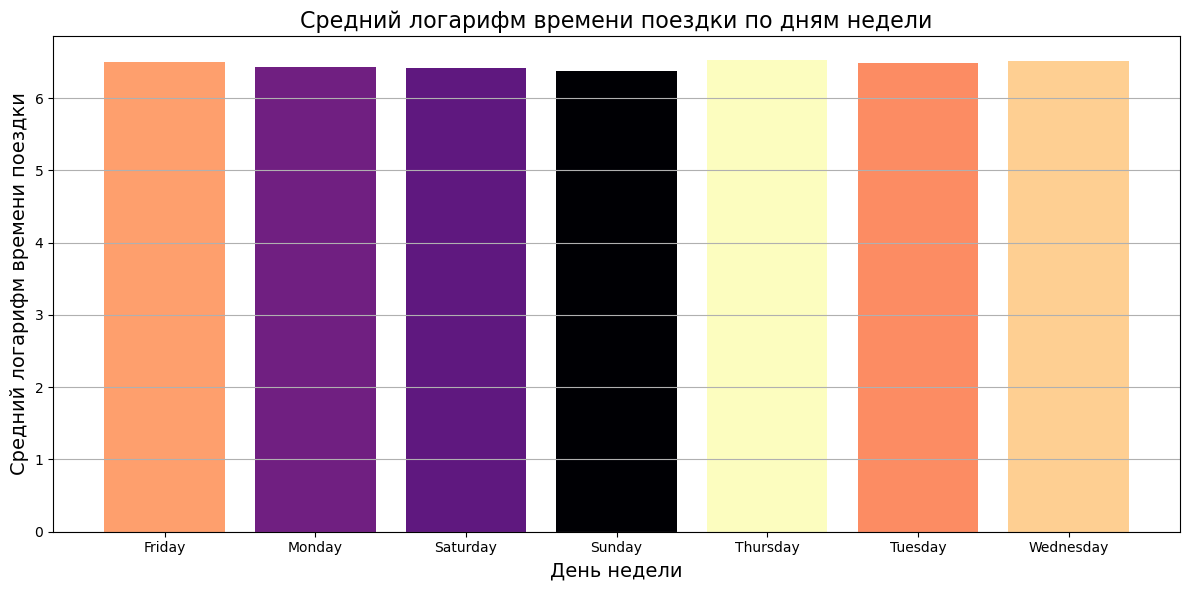

In [704]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)

#График зависимости среднего логарифма времени поездки от дня недели

mean_log_duration = df_train.groupby('weekday')['log_trip_duration'].mean()
norm = plt.Normalize(min(mean_log_duration), max(mean_log_duration))
colors = cmap(norm(mean_log_duration))

plt.figure(figsize=(12, 6))
plt.bar(mean_log_duration.index, mean_log_duration, color=colors)
plt.title('Средний логарифм времени поездки по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Средний логарифм времени поездки', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

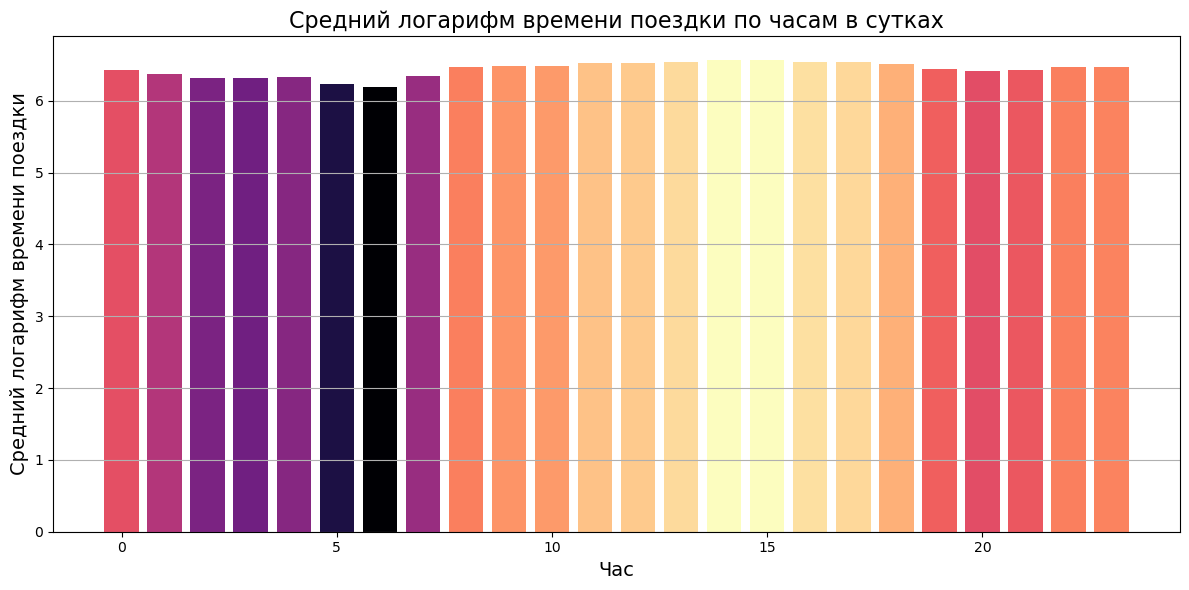

In [705]:
#График зависимости среднего логарифма времени поездки от часа в сутках

mean_log_durationh = df_train.groupby('hour')['log_trip_duration'].mean()
norm = plt.Normalize(min(mean_log_durationh), max(mean_log_durationh))
colors = cmap(norm(mean_log_durationh))

plt.figure(figsize=(12, 6))
plt.bar(mean_log_durationh.index, mean_log_durationh, color=colors)
plt.title('Средний логарифм времени поездки по часам в сутках', fontsize=16)
plt.xlabel('Час', fontsize=14)
plt.ylabel('Средний логарифм времени поездки', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



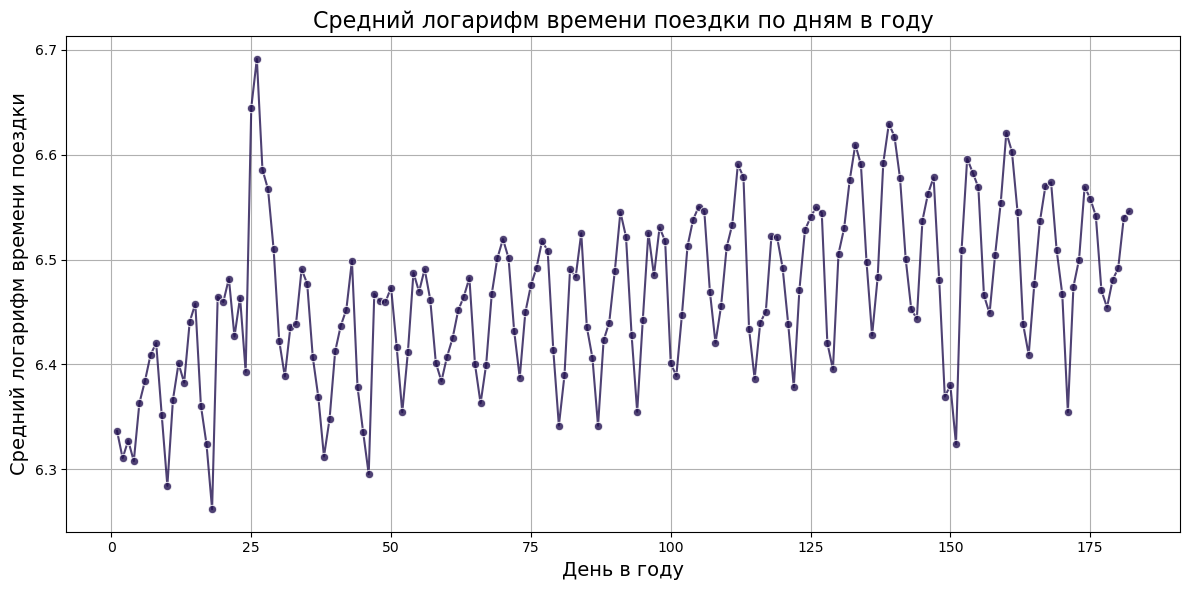

In [706]:
#График зависимости среднего логарифма времени поездки от дня недели
df_train['day_of_year'] = df_train['pickup_datetime'].dt.dayofyear
mean_log_durationd = df_train.groupby('day_of_year')['log_trip_duration'].mean().reset_index()
sns.set_palette("magma")
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_log_durationd, x='day_of_year', y='log_trip_duration', marker='o', alpha=0.8)
plt.title('Средний логарифм времени поездки по дням в году', fontsize=16)
plt.xlabel('День в году', fontsize=14)
plt.ylabel('Средний логарифм времени поездки', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?


**Ответ**:  График таргета для дней недели действительно похож на аналогичный график для количества поездок, в то время как график для часов в сутках не похож вовсе: в нем не прослеживается очевидных пиков и минимумов зависимой переменной. Это может быть связано с тем, что загруженность дорог так же, как и спрос на поездки на такси по дням недели имеет распределение, похожее на равномерное, в то время как спрос на поездки на такси по часам имеет распределение отличное от распределения длительности поездок. Длительность поездок на такси по часам распределена скорее равномерно, в то время как распределение спроса на поездки на такси скорее мультимодально. Вероятно, равномерность времени поездки вне зависимости от времени суток говорит о хорошей пропускной способности улиц Нью-Йорка и отсутствии масштабного тренда на пробки на дорогах. 
В те два аномальных периода (23 января и 30 мая) наблюдалась разнонаправленная динамика: в случае с январем это привело к резкому росту логарифма времени поездки, то есть удлинению средней поездки на такси в этот день, в то время как в мае это привело наоборот к падению, то есть сокращению длительности поездок. Январская динамика объяснима тем, что центр города был перекрыт, что привело к необходимости использовать обходные пути для перемещений, что увеличило длительность стандартной поездки. В мае же, вероятно, был очень низкий спрос на поездки в аэропорт или из него, а поскольку они удалены от центра, то это сократило среднюю длительность поездки. 

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [707]:
#День недели, месяц, час были добавлены в ходе предыдущих шагов 
train['day_of_year'] = train['pickup_datetime'].dt.dayofyear
train['deviance1'] = ((train['pickup_datetime'] >= '2016-01-23') & (train['pickup_datetime'] <= '2016-01-25')).astype(int)
train['deviance2'] = ((train['pickup_datetime'] >= '2016-05-25') & (train['pickup_datetime'] <= '2016-05-30')).astype(int)
#За аномальность берем те 2 периода исторически странных периода с минимальным количеством поездок

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?

Категориальными переменными в данном случае стоит считать 

* аномальность даты, (это бинарный признак, который показывает принадлежность к классу)

* день недели, (это признак принадлежности к какому-то дню недели, что не может быть численной переменной, тем более, пока мы не сделали one-hot кодирование)

* месяц, (показывает месяц совершенной поездки, это именно качественная характеристика принадлежности к классу)

* час (целочисленная переменная, показывает принадлежность к классу поездок конкретного часа в сутках). 

Остальные переменные являются численными. 

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [708]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_log_error

In [709]:
train

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,dates,weekday,hour,month,day_of_year,deviance1,deviance2
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493,2016-03-14,Monday,17,3,74,0,0
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282,2016-06-12,Sunday,0,6,164,0,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527,2016-01-19,Tuesday,11,1,19,0,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785,2016-04-06,Wednesday,19,4,97,0,0
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642,2016-03-26,Saturday,13,3,86,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,4,-73.982201,40.745522,-73.994911,40.740170,N,778,6.658011,2016-04-08,Friday,13,4,99,0,0
1458640,id1049543,1,2016-01-10 07:35:15,1,-74.000946,40.747379,-73.970184,40.796547,N,655,6.486161,2016-01-10,Sunday,7,1,10,0,0
1458641,id2304944,2,2016-04-22 06:57:41,1,-73.959129,40.768799,-74.004433,40.707371,N,764,6.639876,2016-04-22,Friday,6,4,113,0,0
1458642,id2714485,1,2016-01-05 15:56:26,1,-73.982079,40.749062,-73.974632,40.757107,N,373,5.924256,2016-01-05,Tuesday,15,1,5,0,0


In [710]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)

categorical = ['hour', 'month', 'deviance1', 'deviance2']
numeric = ['day_of_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric),
        ('cat', OneHotEncoder(), categorical)
    ])
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])
X_train = df_train[categorical + numeric]
y_train = df_train['log_trip_duration']  
pipeline.fit(X_train, y_train)
X_test = df_test[categorical + numeric]
y_test = df_test['log_trip_duration']
y_pred = pipeline.predict(X_test)
rmlse = np.sqrt(mean_squared_log_error(y_test, y_pred))
rmlse


0.11238655584566627

Полученная модель немного, но лучше, чем наивный прогноз. 

## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [711]:
from typing import Iterable

def show_circles_on_map(
    latitude_values: Iterable[float],
    longitude_values: Iterable[float],
    color: str = "blue",
) -> folium.Map:
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    Works best on samples of size < 10k, too costly otherwise

    latitude_values: sample latitude values of a dataframe
    longitude_column: sample longitude values of a dataframe
    color: the color of circles to be drawn
    """

    location = (np.mean(latitude_values), np.mean(longitude_values))
    m = folium.Map(location=location)

    for lat, lon in zip(latitude_values, longitude_values):
        folium.Circle(
            radius=100,
            location=(lat, lon),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

Напишите функция, которая вернет значения колонок `pickup_latitude`, `pickup_longitude` на каком-нибудь разумном кусочке датафрейма, например, `df.sample(1000)` и покажите на карте, используя `show_circles_on_map`

In [712]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sample_df = train.sample(n=1000, random_state=42)
your_lat_values = sample_df['pickup_latitude'].values
your_lon_values = sample_df['pickup_longitude'].values


show_circles_on_map(your_lat_values, your_lon_values, color="midnightblue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?

**Ответ**: помимо центра, в котором и так очень много поездок совершается ежедневно, это аэропорты (два скопления удаленных точек относительно центра города). Их полезно рассмотреть, потому что это, с одной стороны, типичный маршрут для такси, но, с другой стороны, это является исключением для правила, что большинство поездок совершается в центре города. По сути, это выбросы в терминах координат мест поездок. 

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [713]:
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

train.loc[: ,'haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [714]:
train['log_haversine'] = np.log1p(train['haversine'])

Посчитайте корреляцию и убедитесь, что логарифм расстояния лучше отражает таргет, чем просто расстояние:

In [715]:
correlation_log_haversine = train['log_trip_duration'].corr(train['log_haversine'])
correlation_haversine = train['log_trip_duration'].corr(train['haversine'])
assert(correlation_log_haversine > correlation_haversine)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

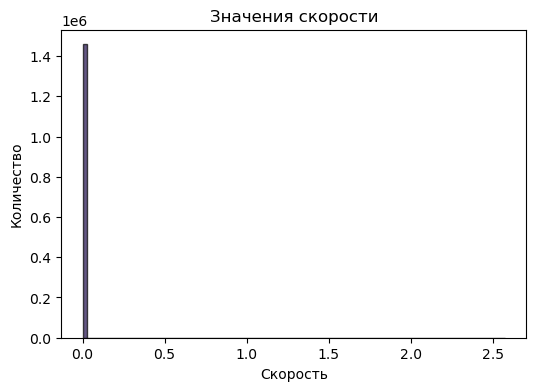

In [716]:
#колонку с trip duration мы специально не удалили ранее, иначе тут все поедет нафиг 
train['mean_speed'] = train['haversine'] / train['trip_duration']

plt.figure(figsize=(6, 4))
plt.hist(train['mean_speed'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Значения скорости')
plt.xlabel('Скорость')
plt.ylabel('Количество')
plt.show()

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

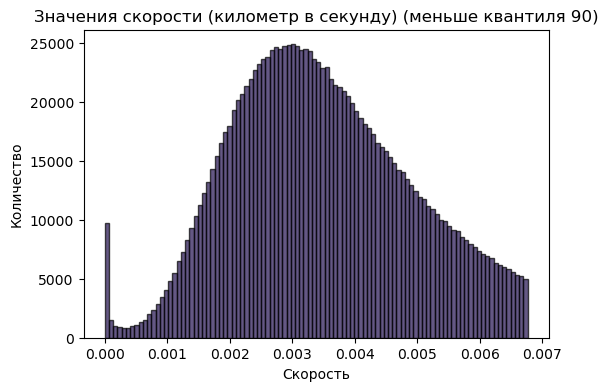

In [717]:
quantile = train['mean_speed'].quantile(.90)

plt.figure(figsize=(6, 4))
plt.hist(train[train['mean_speed'] <= quantile]['mean_speed'], bins=100, edgecolor='k', alpha=0.7)
plt.title('Значения скорости (километр в секунду) (меньше квантиля 90)')
plt.xlabel('Скорость')
plt.ylabel('Количество')
plt.show()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте Heatmap-график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [718]:
train['mean_speed'] #видим, что это значение в метрах в секунду

0          0.003293
1          0.002723
2          0.003006
3          0.003463
4          0.002732
             ...   
1458639    0.001575
1458640    0.009236
1458641    0.010242
1458642    0.002929
1458643    0.005727
Name: mean_speed, Length: 1458644, dtype: float64

In [719]:
train['mean_speed'] = train['mean_speed'] * 3600 #теперь это километры в час


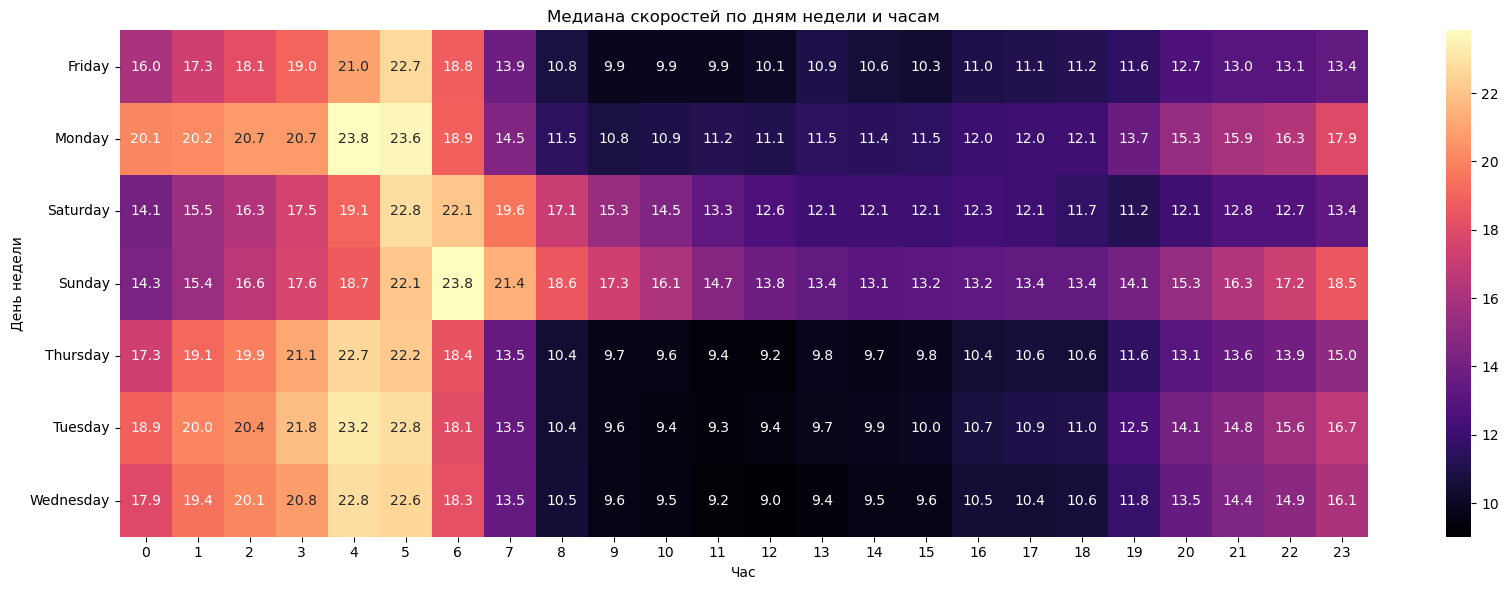

In [720]:
speeds = train.groupby(['weekday', 'hour'])['mean_speed'].median().unstack()

plt.figure(figsize=(17, 6))
sns.heatmap(speeds, cmap='magma', annot=True, fmt=".1f")
plt.title('Медиана скоростей по дням недели и часам')
plt.xlabel('Час')
plt.ylabel('День недели')
plt.tight_layout()
plt.show()

In [721]:
train = train.drop(columns = 'mean_speed')

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

**Ответ**: это создаст мультиколлинеарность в модели, так как скорость - это переменная, выражающаяся через другие признаки в модели. 

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [722]:
train['heavy_traffic'] = ((train['hour'].isin(range(8, 20))) & (train['weekday'] != 'Sunday')).astype(int)
train['light_traffic'] = ((train['weekday'] == 'Sunday') | 
                           (train['hour'].isin(range(0, 7))) | 
                           (train['hour'].isin(range(20, 23)))).astype(int)

#Тут мы выделим воскресенье целиком как день без пробок, потому что по таблице видно, что разница между минимальной и максимальной скоростью в этот день минимальна. 

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака:
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [723]:
#Здесь предлагаю создать признак поездки до или из окрестностей аэропорта. 
#За основу возмем координаты аэропортов +- 3 километра. 
#Это достаточно специфичная характеристика поездки,
#потому что спрос на такси возле аэропрртов сильно менее эластичный по цене 
#из-за низкой доступности иных видов транспорта для того, чтобы добраться до центра города. 
#Это не только гарантирует особую характеристику спроса на такси, но и напрямую влияет на таргет. 
#Так как поездки из аэропорта per se дольше поездок по городу, это может помочь в прогнозировании длительности трипа. 

#координаты аэропорта Джона Кеннеди: (40,64; -73,78)
#координаты аэропорта Ла-Гвардия: (40,78; -73,87)
jfk_coords = (40.642334, -73.78817)
lga_coords = (40.7769, -73.8739)
#(0.01 градуса примерно соответствует 1 км в широте и долготе) 

import math

def is_near_airport(lat, lon, airport_coords):
    R = 6371 
    lat1, lon1 = math.radians(lat), math.radians(lon)
    lat2, lon2 = math.radians(airport_coords[0]), math.radians(airport_coords[1])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    distance = R * c
    return 1 if distance <= 3 else 0  #считаем в пределах 3 км и возвращаем 1 или 0 для кодирования поездки


train['airport_pickup'] = train.apply(lambda row: is_near_airport(row['pickup_latitude'], row['pickup_longitude'], jfk_coords) or 
                                  is_near_airport(row['pickup_latitude'], row['pickup_longitude'], lga_coords), axis=1)

train['airport_dropoff'] = train.apply(lambda row: is_near_airport(row['dropoff_latitude'], row['dropoff_longitude'], jfk_coords) or 
                                   is_near_airport(row['dropoff_latitude'], row['dropoff_longitude'], lga_coords), axis=1)


Для каждого из созданных признаков нарисуйте "ящик с усами" (aka boxplot) распределения логарифма времени поездки

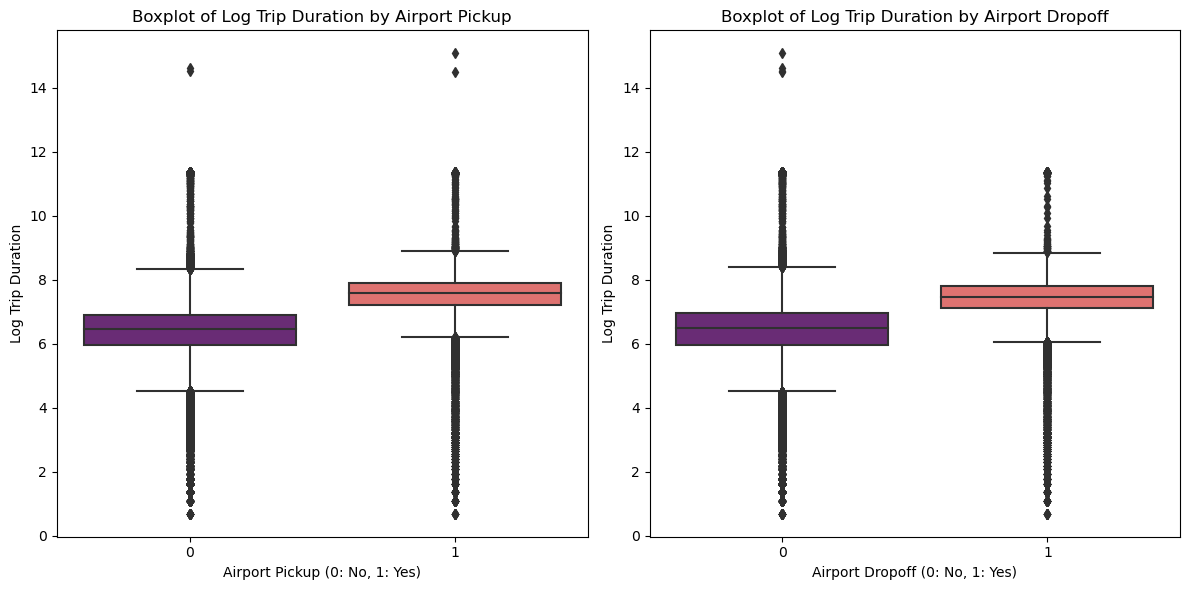

In [724]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='airport_pickup', y='log_trip_duration', data=train, palette = 'magma')
plt.title('Boxplot of Log Trip Duration by Airport Pickup')
plt.xlabel('Airport Pickup (0: No, 1: Yes)')
plt.ylabel('Log Trip Duration')

plt.subplot(1, 2, 2)
sns.boxplot(x='airport_dropoff', y='log_trip_duration', data=train, palette = 'magma')
plt.title('Boxplot of Log Trip Duration by Airport Dropoff')
plt.xlabel('Airport Dropoff (0: No, 1: Yes)')
plt.ylabel('Log Trip Duration')

plt.tight_layout()
plt.show()

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

**Ответ**: как видно из графиков, действительно, даже при наличии большого количества выбросов, мы видим, что средняя продолжительность поездки в аэропорт (причем любой) или из него увеличивает логарифм среднего времени поездки с примерно 6,5 до почти 8. Проведем тест на равенство математических ожиданий в двух группах. 

In [725]:
import scipy.stats as stats
#H0: математическое ожидание среднего логарифма времени поездки в двух группах равны
#Н1: математические ожидание среднего логарифсма времени поездки в двух группах не равны
pickup_0 = train[train['airport_pickup'] == 0]['log_trip_duration']
pickup_1 = train[train['airport_pickup'] == 1]['log_trip_duration']

dropoff_0 = train[train['airport_dropoff'] == 0]['log_trip_duration']
dropoff_1 = train[train['airport_dropoff'] == 1]['log_trip_duration']

# t-тест для airport_pickup
t_stat_pickup, p_value_pickup = stats.ttest_ind(pickup_0, pickup_1, equal_var=False)

# t-тест для airport_dropoff
t_stat_dropoff, p_value_dropoff = stats.ttest_ind(dropoff_0, dropoff_1, equal_var=False)


In [726]:
t_stat_pickup

-322.6839041199351

In [727]:
t_stat_dropoff

-149.15183762909578

In [728]:
p_value_pickup

0.0

In [729]:
p_value_dropoff

0.0

Судя по т-статистике, мы можем сделать вывод, что математические ожидания в этих группах не равны, что позволяет не принять нулевую гипотезу на любом адекватном уровне значимости. Следовательно, созданные признаки действительно имеют смысл. 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [730]:
mean_latitude = train['pickup_latitude'].mean()
mean_longitude = train['pickup_longitude'].mean()

In [731]:
train['distance_to_center'] = np.sqrt((train['pickup_latitude'] - mean_latitude)**2 + 
                                         (train['pickup_longitude'] - mean_longitude)**2)
threshold = train['distance_to_center'].quantile(0.95)

min_longitude = min(train[train['distance_to_center'] < threshold]['pickup_longitude'].min(), 
                        train[train['distance_to_center'] < threshold]['pickup_longitude'].min())
max_longitude = max(train[train['distance_to_center'] < threshold]['pickup_longitude'].max(), 
                        train[train['distance_to_center'] < threshold]['pickup_longitude'].max())

min_latitude = min(train[train['distance_to_center'] < threshold]['pickup_latitude'].min(), 
                        train[train['distance_to_center'] < threshold]['pickup_latitude'].min())
max_latitude = max(train[train['distance_to_center'] < threshold]['pickup_latitude'].max(), 
                        train[train['distance_to_center'] < threshold]['pickup_latitude'].max())

train = train.drop(columns = 'distance_to_center')

In [732]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_rows=3, n_cols=4, x_range=(min_longitude, max_longitude), y_range=(min_latitude, max_latitude)):
        self.n_rows = n_rows
        self.n_cols = n_cols
        self.x_range = x_range
        self.y_range = y_range
        self.x_bins = np.linspace(x_range[0], x_range[1], n_cols + 1)
        self.y_bins = np.linspace(y_range[0], y_range[1], n_rows + 1)

    def show_map(self, pickups=None, dropoffs=None):
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.set_xlim(self.x_range)
        ax.set_ylim(self.y_range)
        for x in self.x_bins:
            ax.axvline(x, color='grey', linestyle='--', alpha=0.6)
        for y in self.y_bins:
            ax.axhline(y, color='grey', linestyle='--', alpha=0.6)
        
        if pickups is not None:
            ax.scatter(pickups['pickup_longitude'], pickups['pickup_latitude'], s=1, alpha=0.1, color='blue')
        if dropoffs is not None:
            ax.scatter(dropoffs['dropoff_longitude'], dropoffs['dropoff_latitude'], s=1, alpha=0.01, color='blue')
        
        plt.xlabel('Longitude')
        plt.ylabel('Latitude')
        plt.show()

    def fit(self, X=None, y=None):
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        X_copy['pickup_cell'] = np.digitize(X_copy['pickup_longitude'], self.x_bins) + \
                                np.digitize(X_copy['pickup_latitude'], self.y_bins) * (self.n_cols + 1)
        X_copy['dropoff_cell'] = np.digitize(X_copy['dropoff_longitude'], self.x_bins) + \
                                 np.digitize(X_copy['dropoff_latitude'], self.y_bins) * (self.n_cols + 1)

        X_copy.loc[(X_copy['pickup_longitude'] < self.x_range[0]) |
                   (X_copy['pickup_longitude'] > self.x_range[1]) |
                   (X_copy['pickup_latitude'] < self.y_range[0]) |
                   (X_copy['pickup_latitude'] > self.y_range[1]), 'pickup_cell'] = -1
        X_copy.loc[(X_copy['dropoff_longitude'] < self.x_range[0]) |
                   (X_copy['dropoff_longitude'] > self.x_range[1]) |
                   (X_copy['dropoff_latitude'] < self.y_range[0]) |
                   (X_copy['dropoff_latitude'] > self.y_range[1]), 'dropoff_cell'] = -1

        return X_copy[['pickup_cell', 'dropoff_cell']]


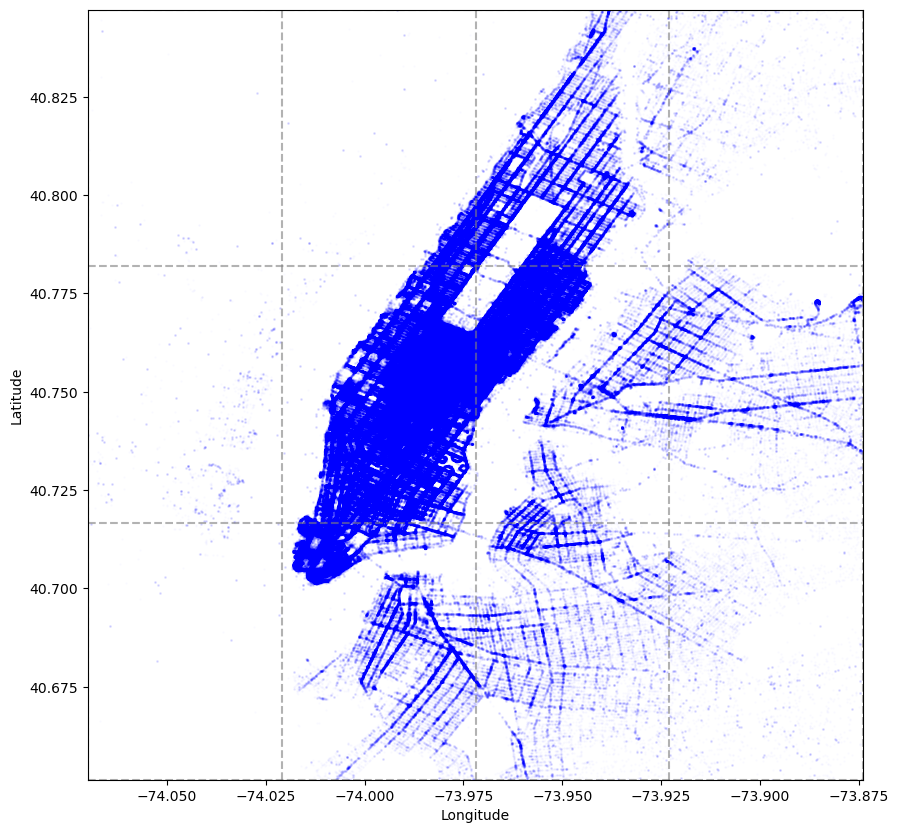

In [733]:
transformer = MapGridTransformer()
transformer.show_map(pickups=train, dropoffs= train)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

In [734]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'dates', 'weekday', 'hour', 'month', 'day_of_year',
       'deviance1', 'deviance2', 'haversine', 'log_haversine', 'heavy_traffic',
       'light_traffic', 'airport_pickup', 'airport_dropoff'],
      dtype='object')

In [735]:
train = train.drop(columns = 'haversine')

Категориальные переменные, требующие One-Hot кодирования:

* weekday
* hour
* month
* deviance1
* deviance2

airport_pickup, airport_dropoff - уже переменные, закодированные по своему дизайну

heavy_traffic и light_traffic - колонки, которые могут привести к мультиколлинеарности, поэтому дропнем одну из них (пусть это будет light_traffic)


In [736]:
train = train.drop(columns = 'light_traffic')

In [737]:
cat_features = ['weekday', 'hour', 'month', 'deviance1', 'deviance2']
num_features = ['airport_pickup', 'airport_dropoff', 'heavy_traffic', 'day_of_year', 'log_haversine']
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['airport_pickup',
                                                   'airport_dropoff',
                                                   'heavy_traffic',
                                                   'day_of_year',
                                                   'log_haversine']),
                                                 ('cat', OneHotEncoder(),
                                                  ['weekday', 'hour', 'month',
                                                   'deviance1',
                                                   'deviance2'])])),
                ('regressor', Ridge())])

In [738]:
y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))

rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

rmsle_test


0.07241705069779411

Заметим, что RMLSE заметно упал для новой созданной модели. 

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

**Ответ**: 

* vendor_id - это код перевозчика. Возможно, он может быть полезен, если вдруг выяснится, что перевозчик работает только в одном конкретном районе, что сокращает/увеличивает время поездки; если у какого-то перевозчика более оптимальные маршруты/новые автомобили
* passenger_count - это количество пассажиров в автомобиле перевозчика. Время поездки может увеличиться, если по пути завозят кого-то из пассажиров в промежуточные пункты назначения. 
* store_and_fwd_flag - это флаг проблем со связью у такси. Если это ненулевой флаг, то тогда рассчитанное время поездки ненадежно и может быть искажено. 

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [739]:
unique_vendor_id = train['vendor_id'].nunique()
unique_passenger_count = train['passenger_count'].nunique()
unique_store_and_fwd_flag = train['store_and_fwd_flag'].nunique()

print("Уникальных значений vendor_id:", unique_vendor_id)
print("Уникальных значений passenger_count:", unique_passenger_count)
print("Уникальных значений store_and_fwd_flag:", unique_store_and_fwd_flag)

Уникальных значений vendor_id: 2
Уникальных значений passenger_count: 10
Уникальных значений store_and_fwd_flag: 2


Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

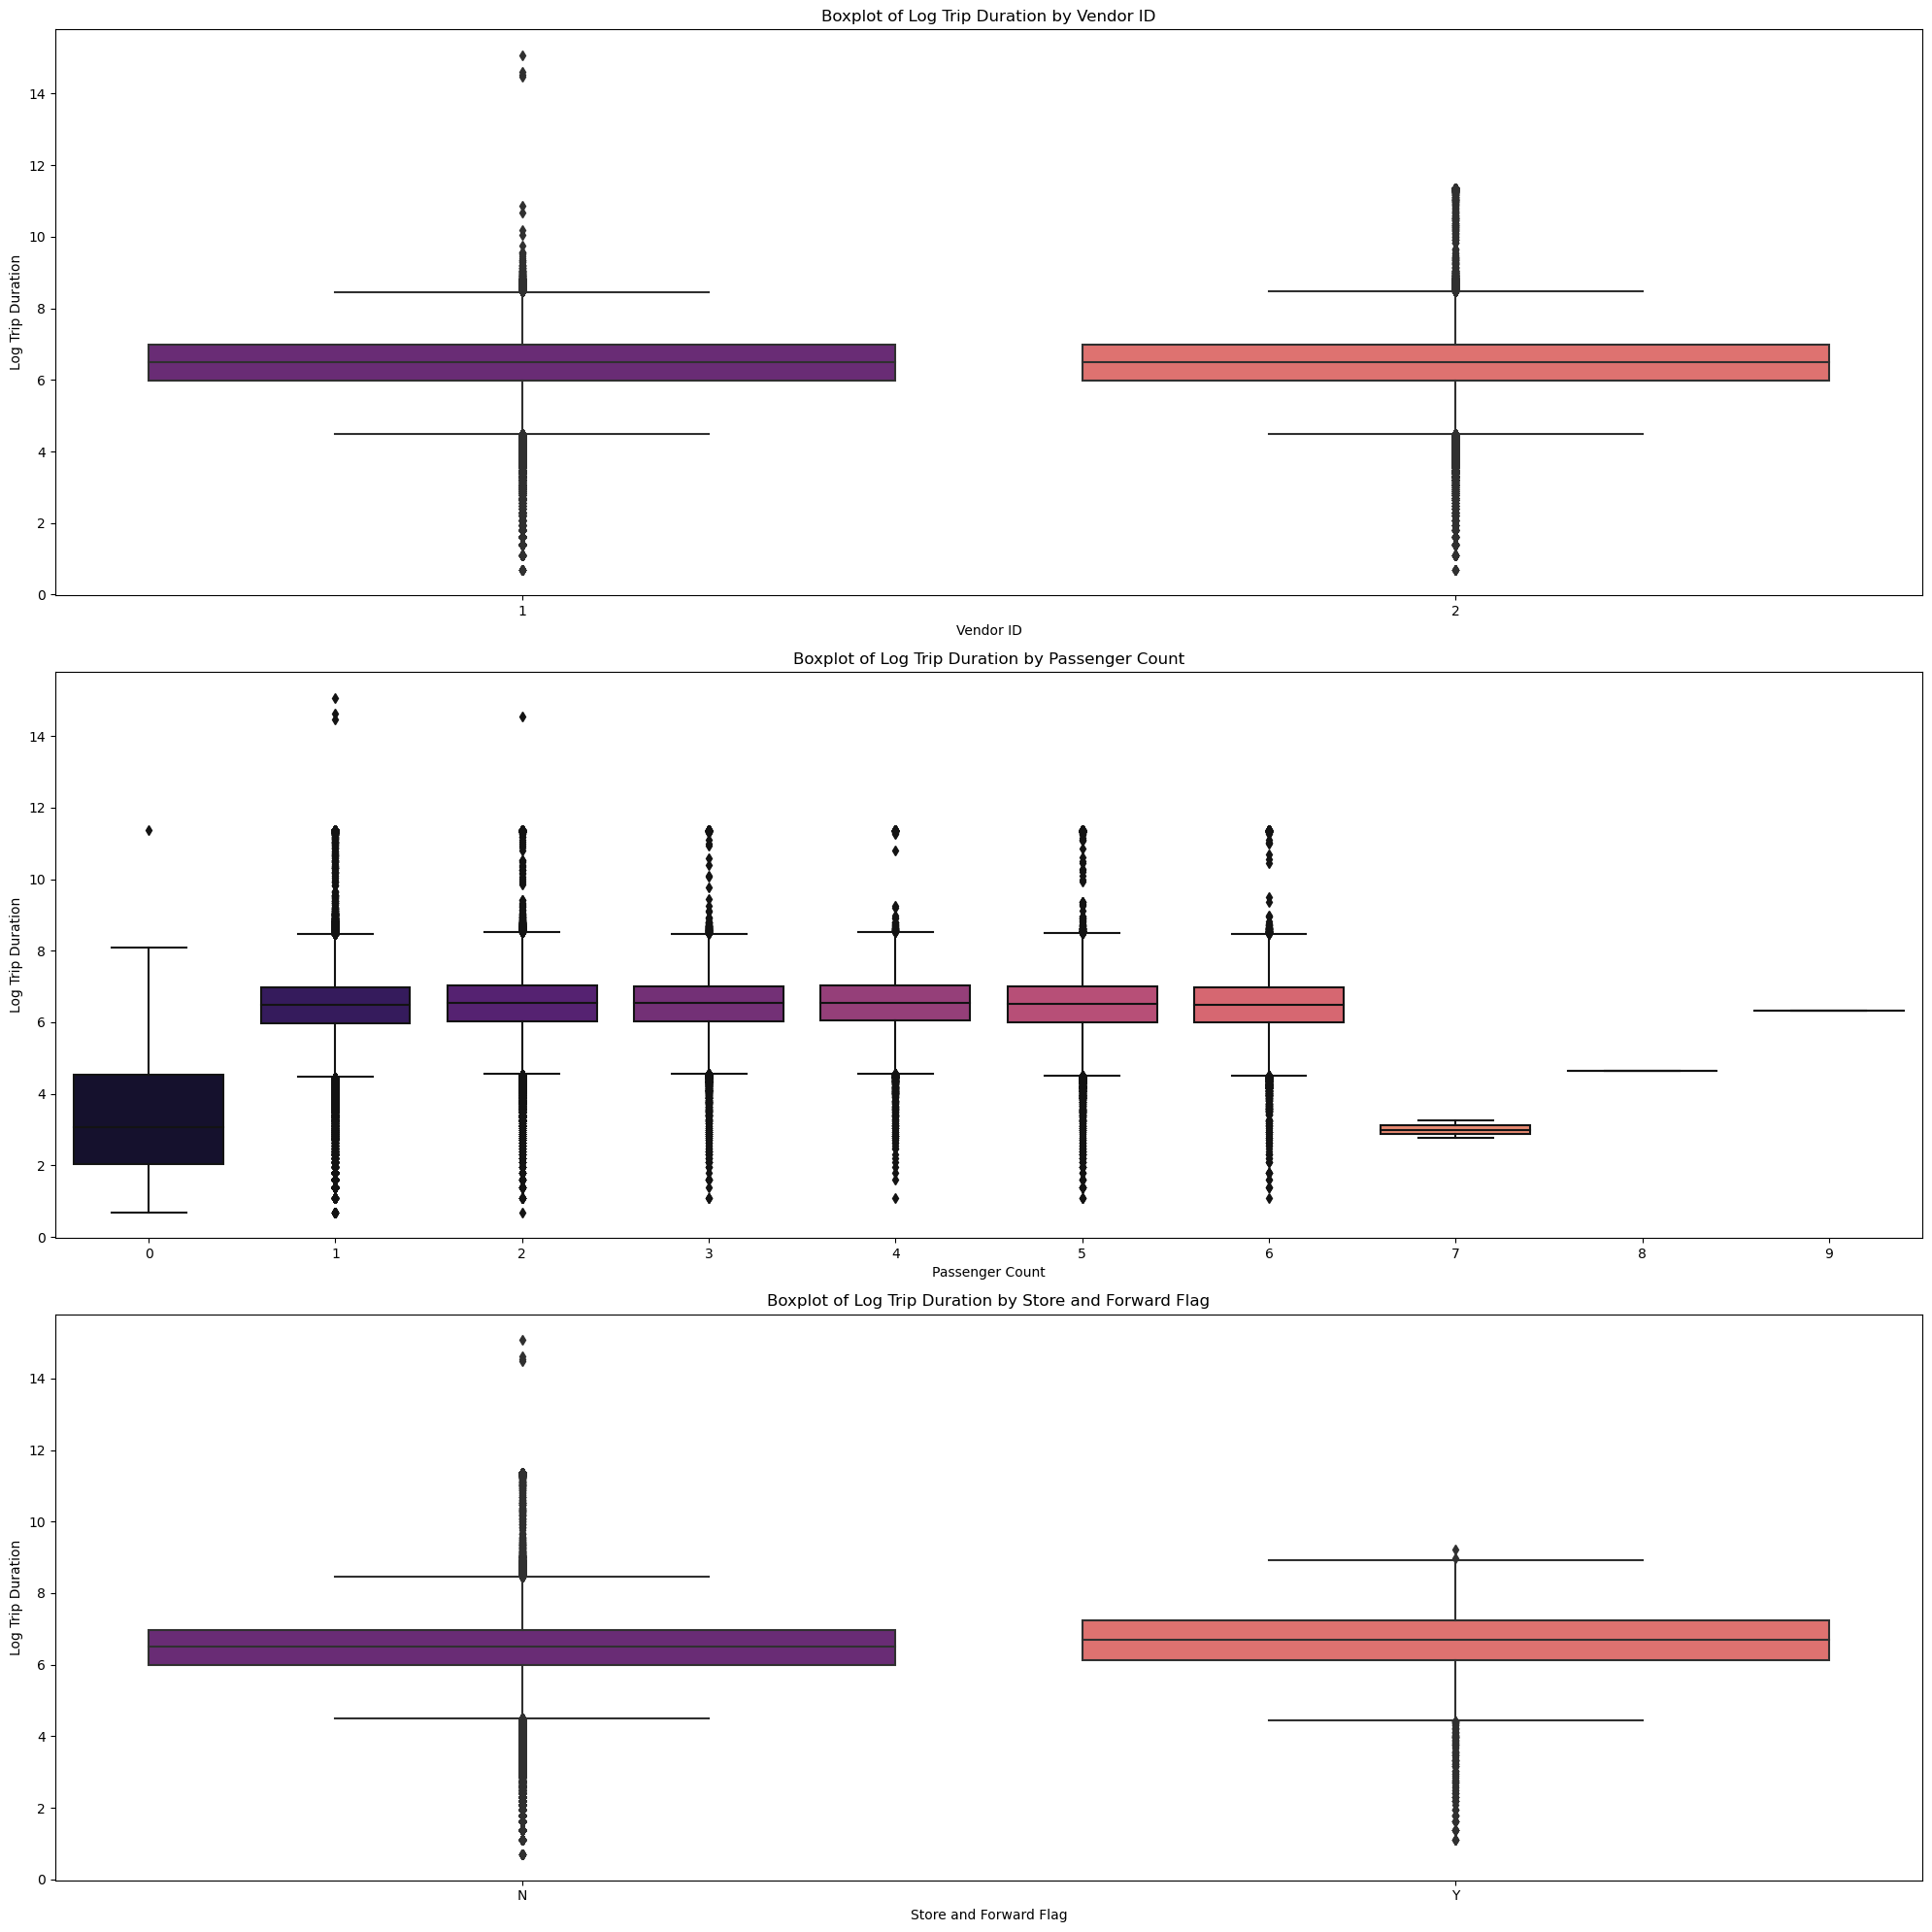

In [740]:
plt.figure(figsize=(20, 20))
#Boxplot для Vendor ID
plt.subplot(3, 1, 1)
sns.boxplot(x='vendor_id', y='log_trip_duration', data=train, palette='magma')
plt.title('Boxplot of Log Trip Duration by Vendor ID')
plt.xlabel('Vendor ID')
plt.ylabel('Log Trip Duration')

#Boxplot для passenger_count 
plt.subplot(3, 1, 2)
sns.boxplot(x='passenger_count', y='log_trip_duration', data=train, palette='magma')
plt.title('Boxplot of Log Trip Duration by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Log Trip Duration')

#Boxplot для store_and_fwd_flag
plt.subplot(3, 1, 3)
sns.boxplot(x='store_and_fwd_flag', y='log_trip_duration', data=train, palette='magma')
plt.title('Boxplot of Log Trip Duration by Store and Forward Flag')
plt.xlabel('Store and Forward Flag')
plt.ylabel('Log Trip Duration')


plt.tight_layout()
plt.show()

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [741]:
train['vendor_id'].unique()

array([2, 1])

In [742]:
train['vendor_id'] = train['vendor_id'] - 1 #так как у нас только значения 2 и 1 
train['store_and_fwd_flag'] = train['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

Нет, ящики с усами показывают практически идентичные средние значения для каждой категории. 

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [743]:
#все три признака являются категориальными переменными, потому что один из них - это флаг, другой - дискретное количество людей, а третье - по сути название вендора

cat_features = ['weekday', 'hour', 'month', 'deviance1', 'deviance2', 'vendor_id', 'store_and_fwd_flag', 'passenger_count']
num_features = ['airport_pickup', 'airport_dropoff', 'heavy_traffic', 'day_of_year', 'log_haversine']
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['airport_pickup',
                                                   'airport_dropoff',
                                                   'heavy_traffic',
                                                   'day_of_year',
                                                   'log_haversine']),
                                                 ('cat', OneHotEncoder(),
                                                  ['weekday', 'hour', 'month',
                                                   'deviance1', 'deviance2',
                                                   'vendor_id',
                                                   'store_and_fwd_flag',
                                                   'passenger_count'])])),
                ('regressor', Ridge())])

In [744]:
y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))

rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

rmsle_test

0.07231183254909418

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

**Ответ**: Признаки не дали улучшения метрики. Удалим их. 

In [745]:
train = train.drop(columns = ['vendor_id', 'store_and_fwd_flag', 'passenger_count'])

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

In [746]:
train.columns

Index(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'log_trip_duration', 'dates', 'weekday', 'hour', 'month', 'day_of_year',
       'deviance1', 'deviance2', 'log_haversine', 'heavy_traffic',
       'airport_pickup', 'airport_dropoff'],
      dtype='object')

In [747]:
#Чтобы предотвратить утечку данных, сразу разделим выборку на тестовую и тренировочную. 
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)


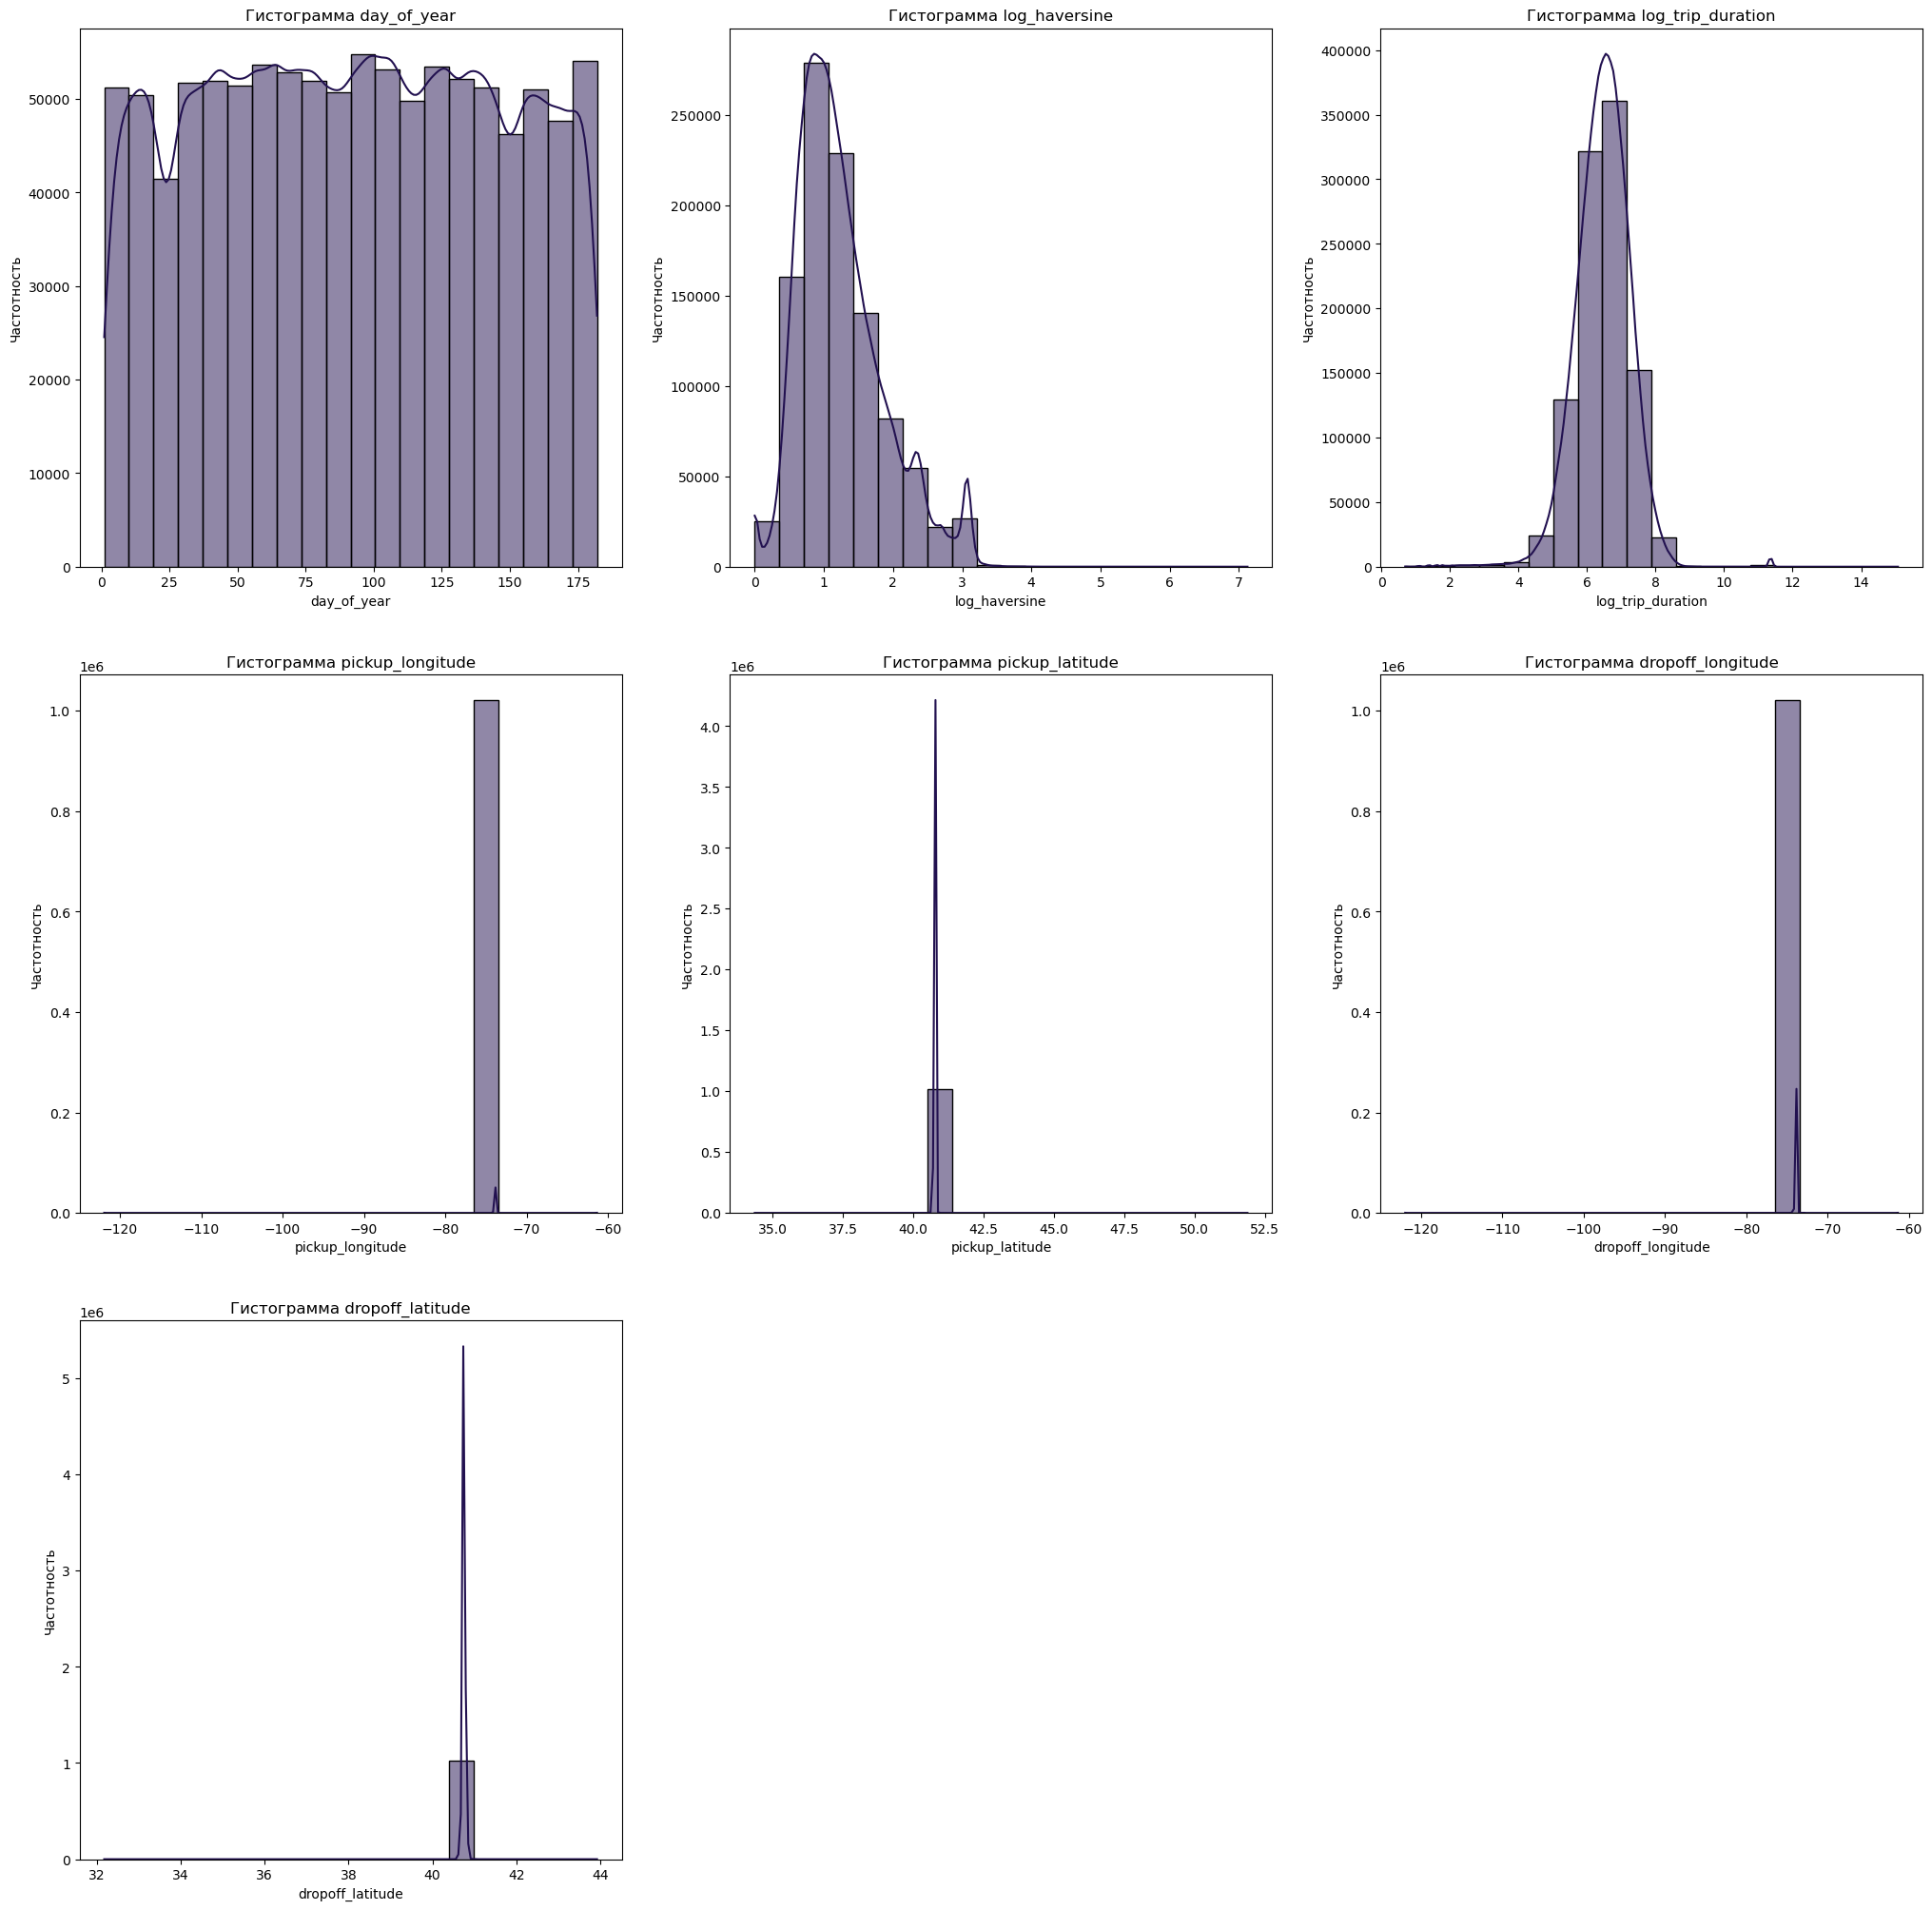

In [748]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(25, 25))
numeric_columns = ['day_of_year', 'log_haversine', 'log_trip_duration', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude' ]
for i, column in enumerate((numeric_columns)):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(df_train[column], bins=20, kde=True) 
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частотность')

Видно, что, действительно, выбросы есть, причем они создают очень сильную ассимметрию распределений. Очистим от выбросов и сравним. 

In [749]:
def outliers(column):
    q1 = df_train[column].quantile(0.25)
    q3 = df_train[column].quantile(0.75)
    iqr = q3 - q1
    left = q1 - 1.5 * iqr
    right = q3 + 1.5 * iqr
    return left, right

for i in numeric_columns:
    left, right = outliers(i)
    df_train = df_train[(df_train[i] > left) & (df_train[i] < right)]

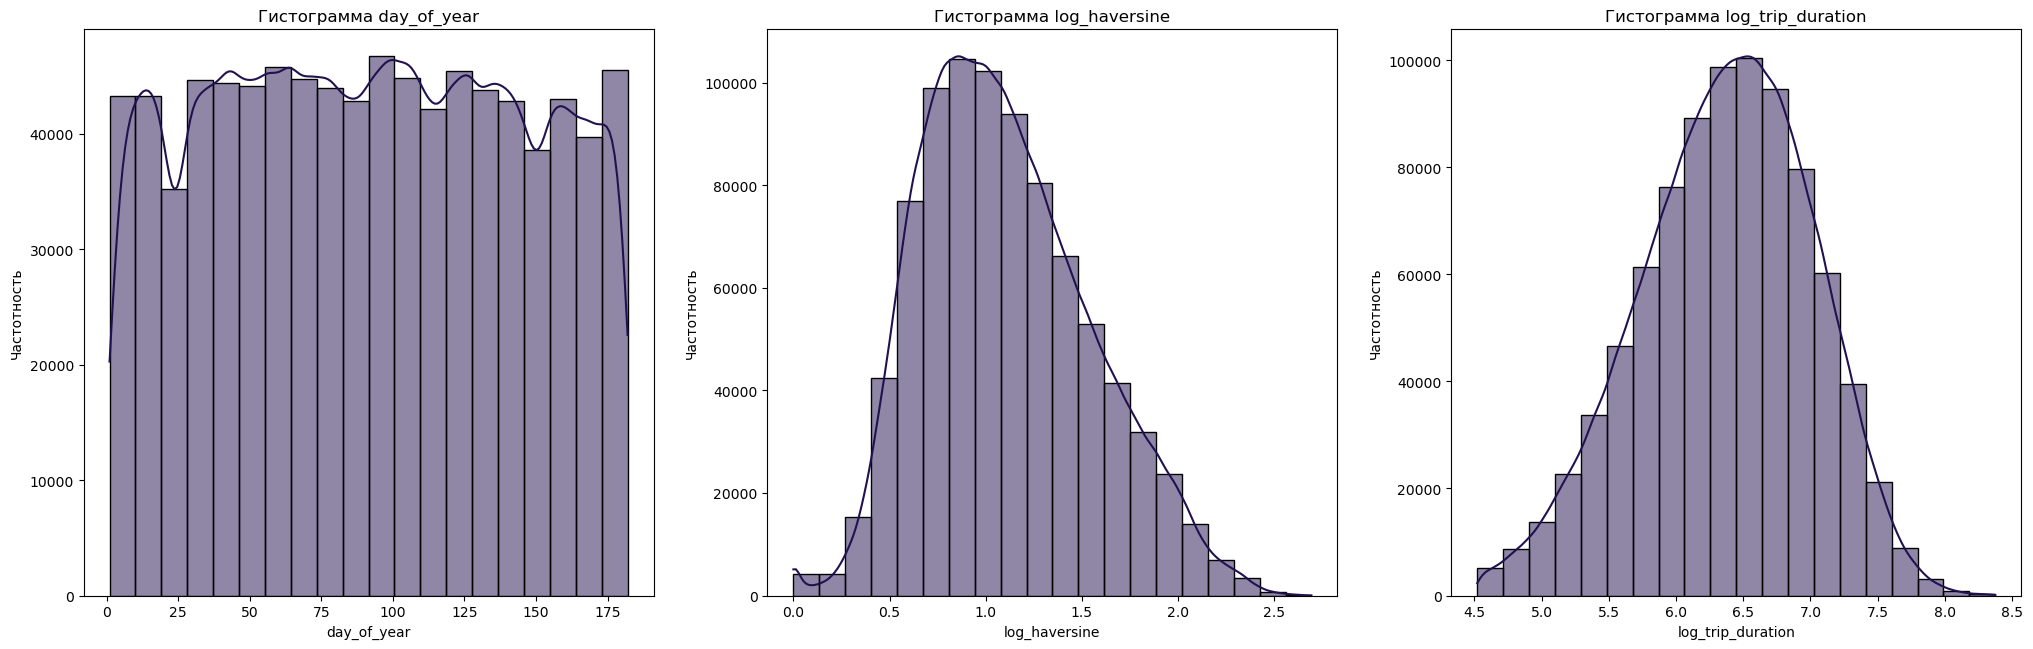

In [750]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(25, 25))
numeric_columns = ['day_of_year', 'log_haversine', 'log_trip_duration' ] #я не трогаю  'pickup_longitude', 'pickup_latitude', потому что они сами являются категориями с значимыми выбросами (аэропорты), что было обработано ранее'dropoff_longitude', 'dropoff_latitude'
for i, column in enumerate((numeric_columns)):
    plt.subplot(3, 3, i + 1) 
    sns.histplot(df_train[column], bins=20, kde=True) 
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частотность')

Действительно, стало сильно лучше:)

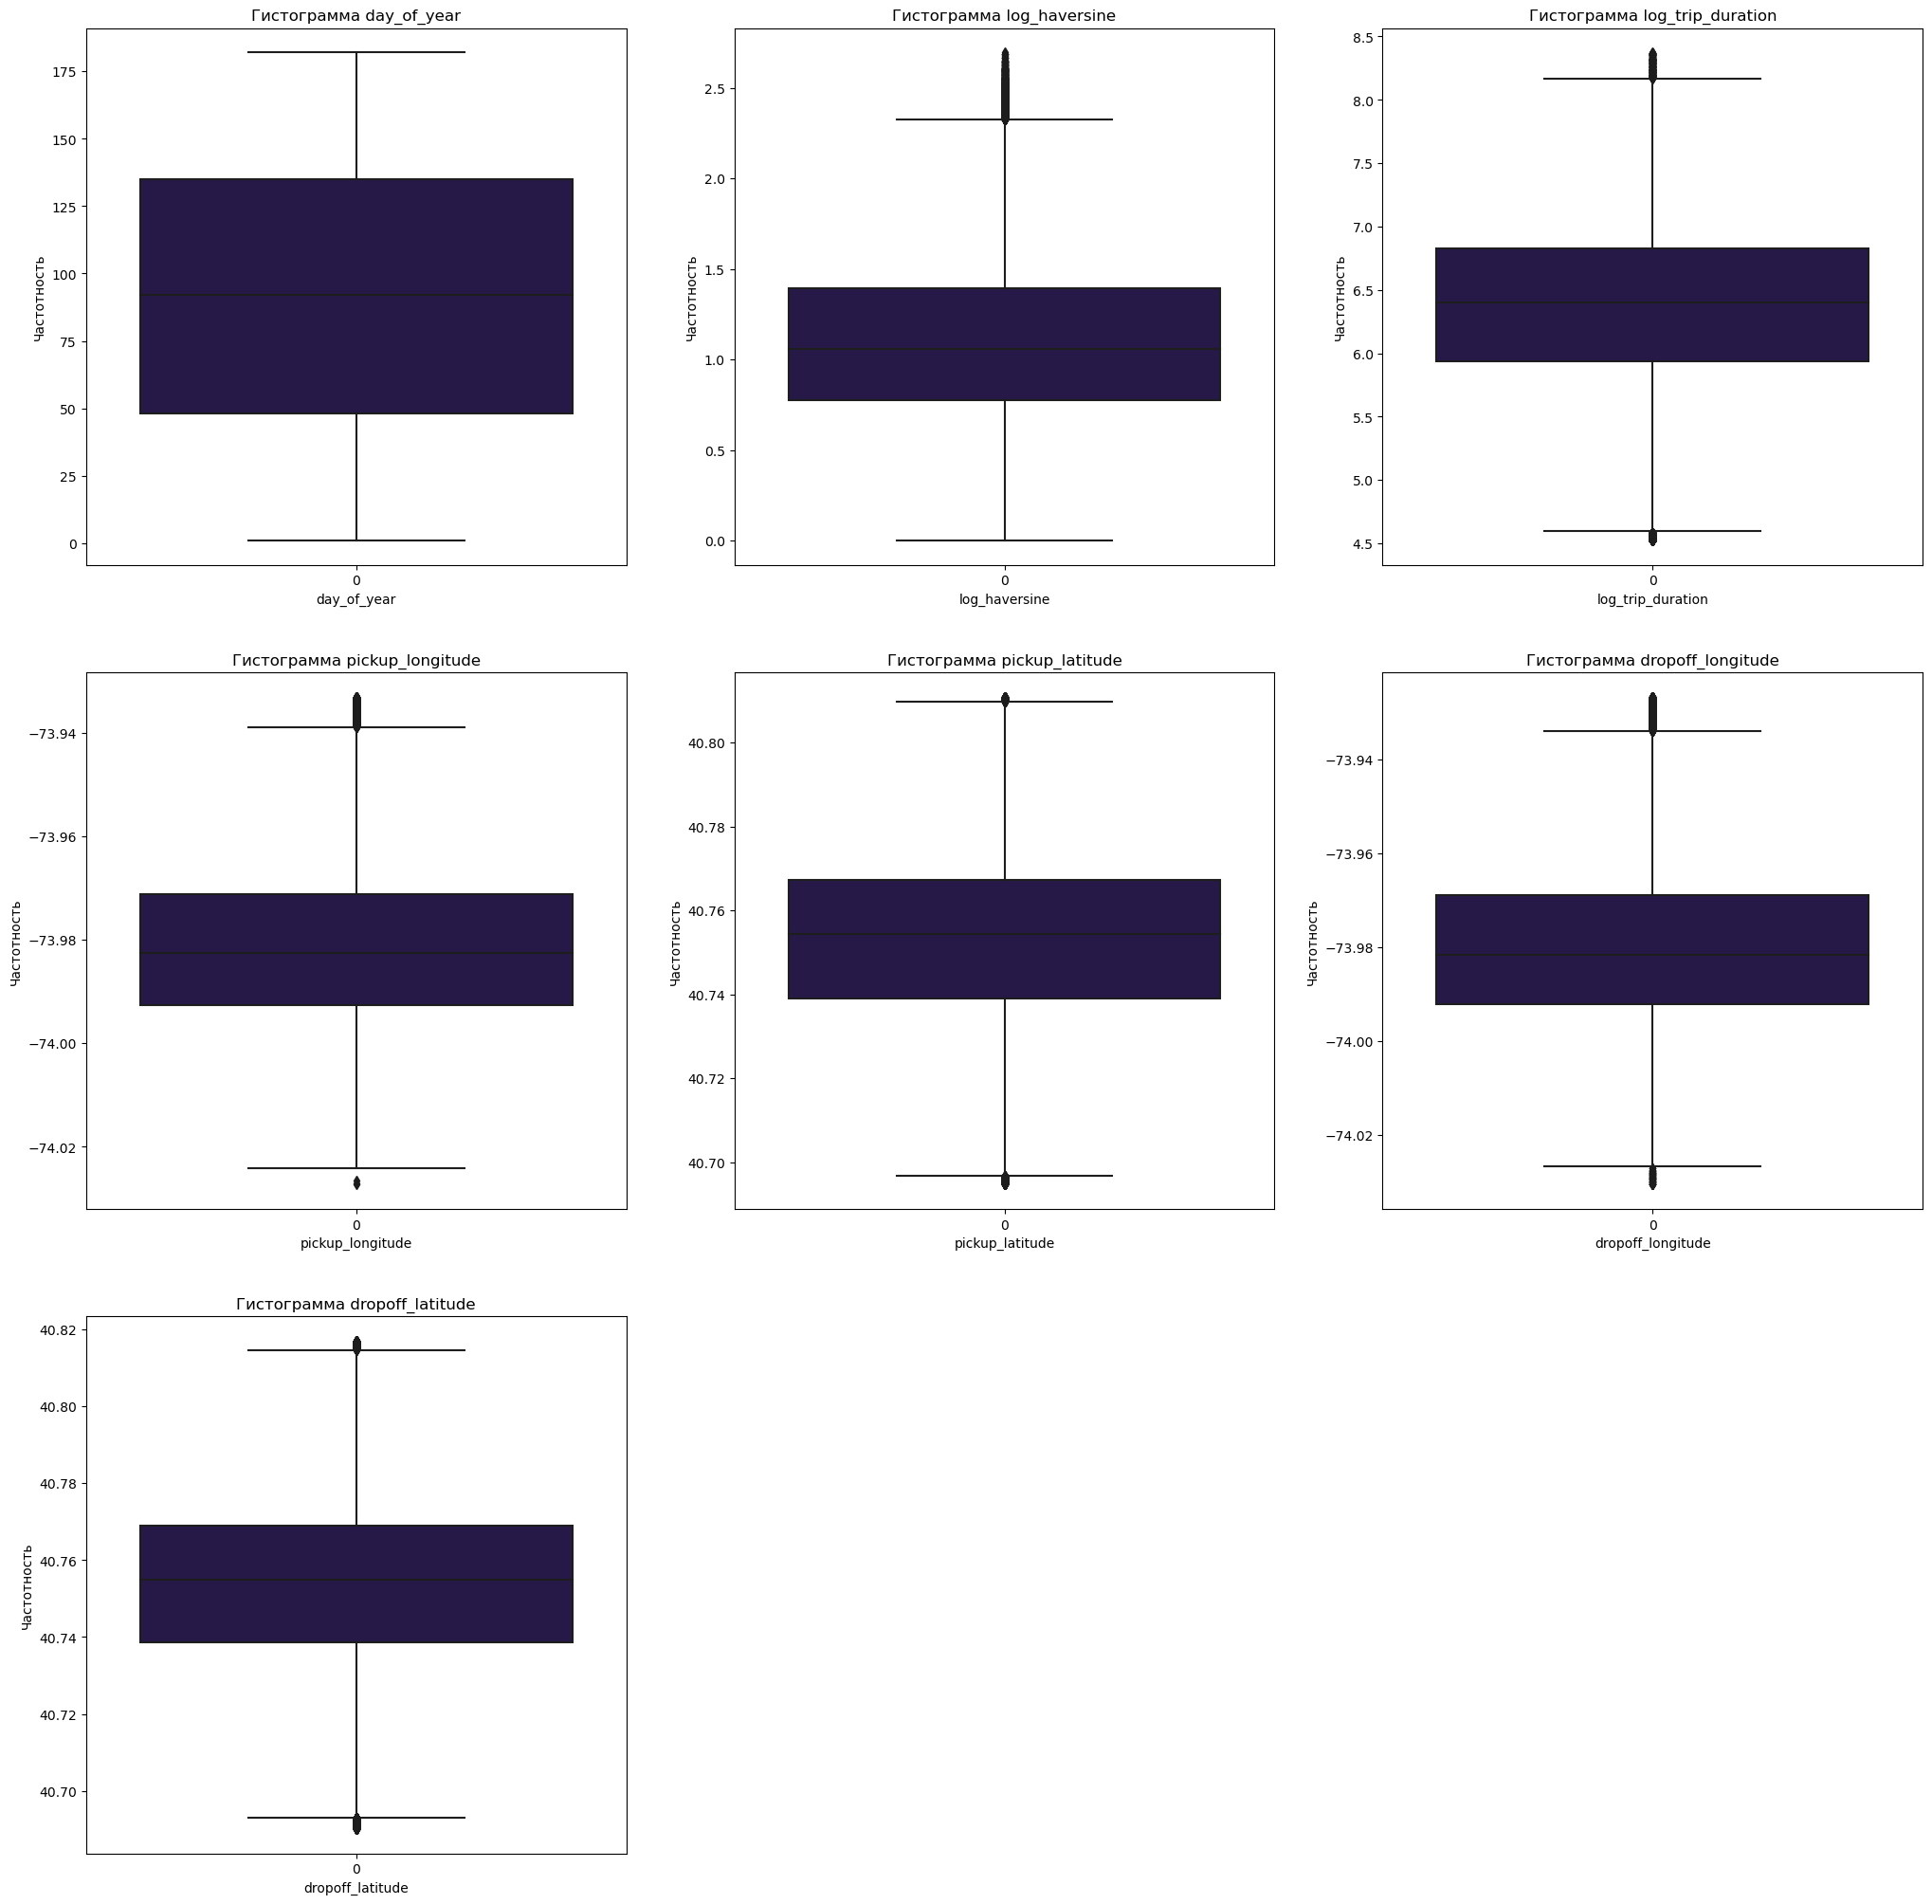

In [751]:
#Проверим чистоту данных на boxplot 
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(25, 25))
numeric_columns = ['day_of_year', 'log_haversine', 'log_trip_duration', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude' ]
for i, column in enumerate((numeric_columns)):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(df_train[column], color = color) 
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частотность')

Видим, что очистили данные не до конца. Очистим до конца от выбросов. 

In [752]:
for i in numeric_columns:
    left, right = outliers(i)
    df_train = df_train[(df_train[i] > left) & (df_train[i] < right)]

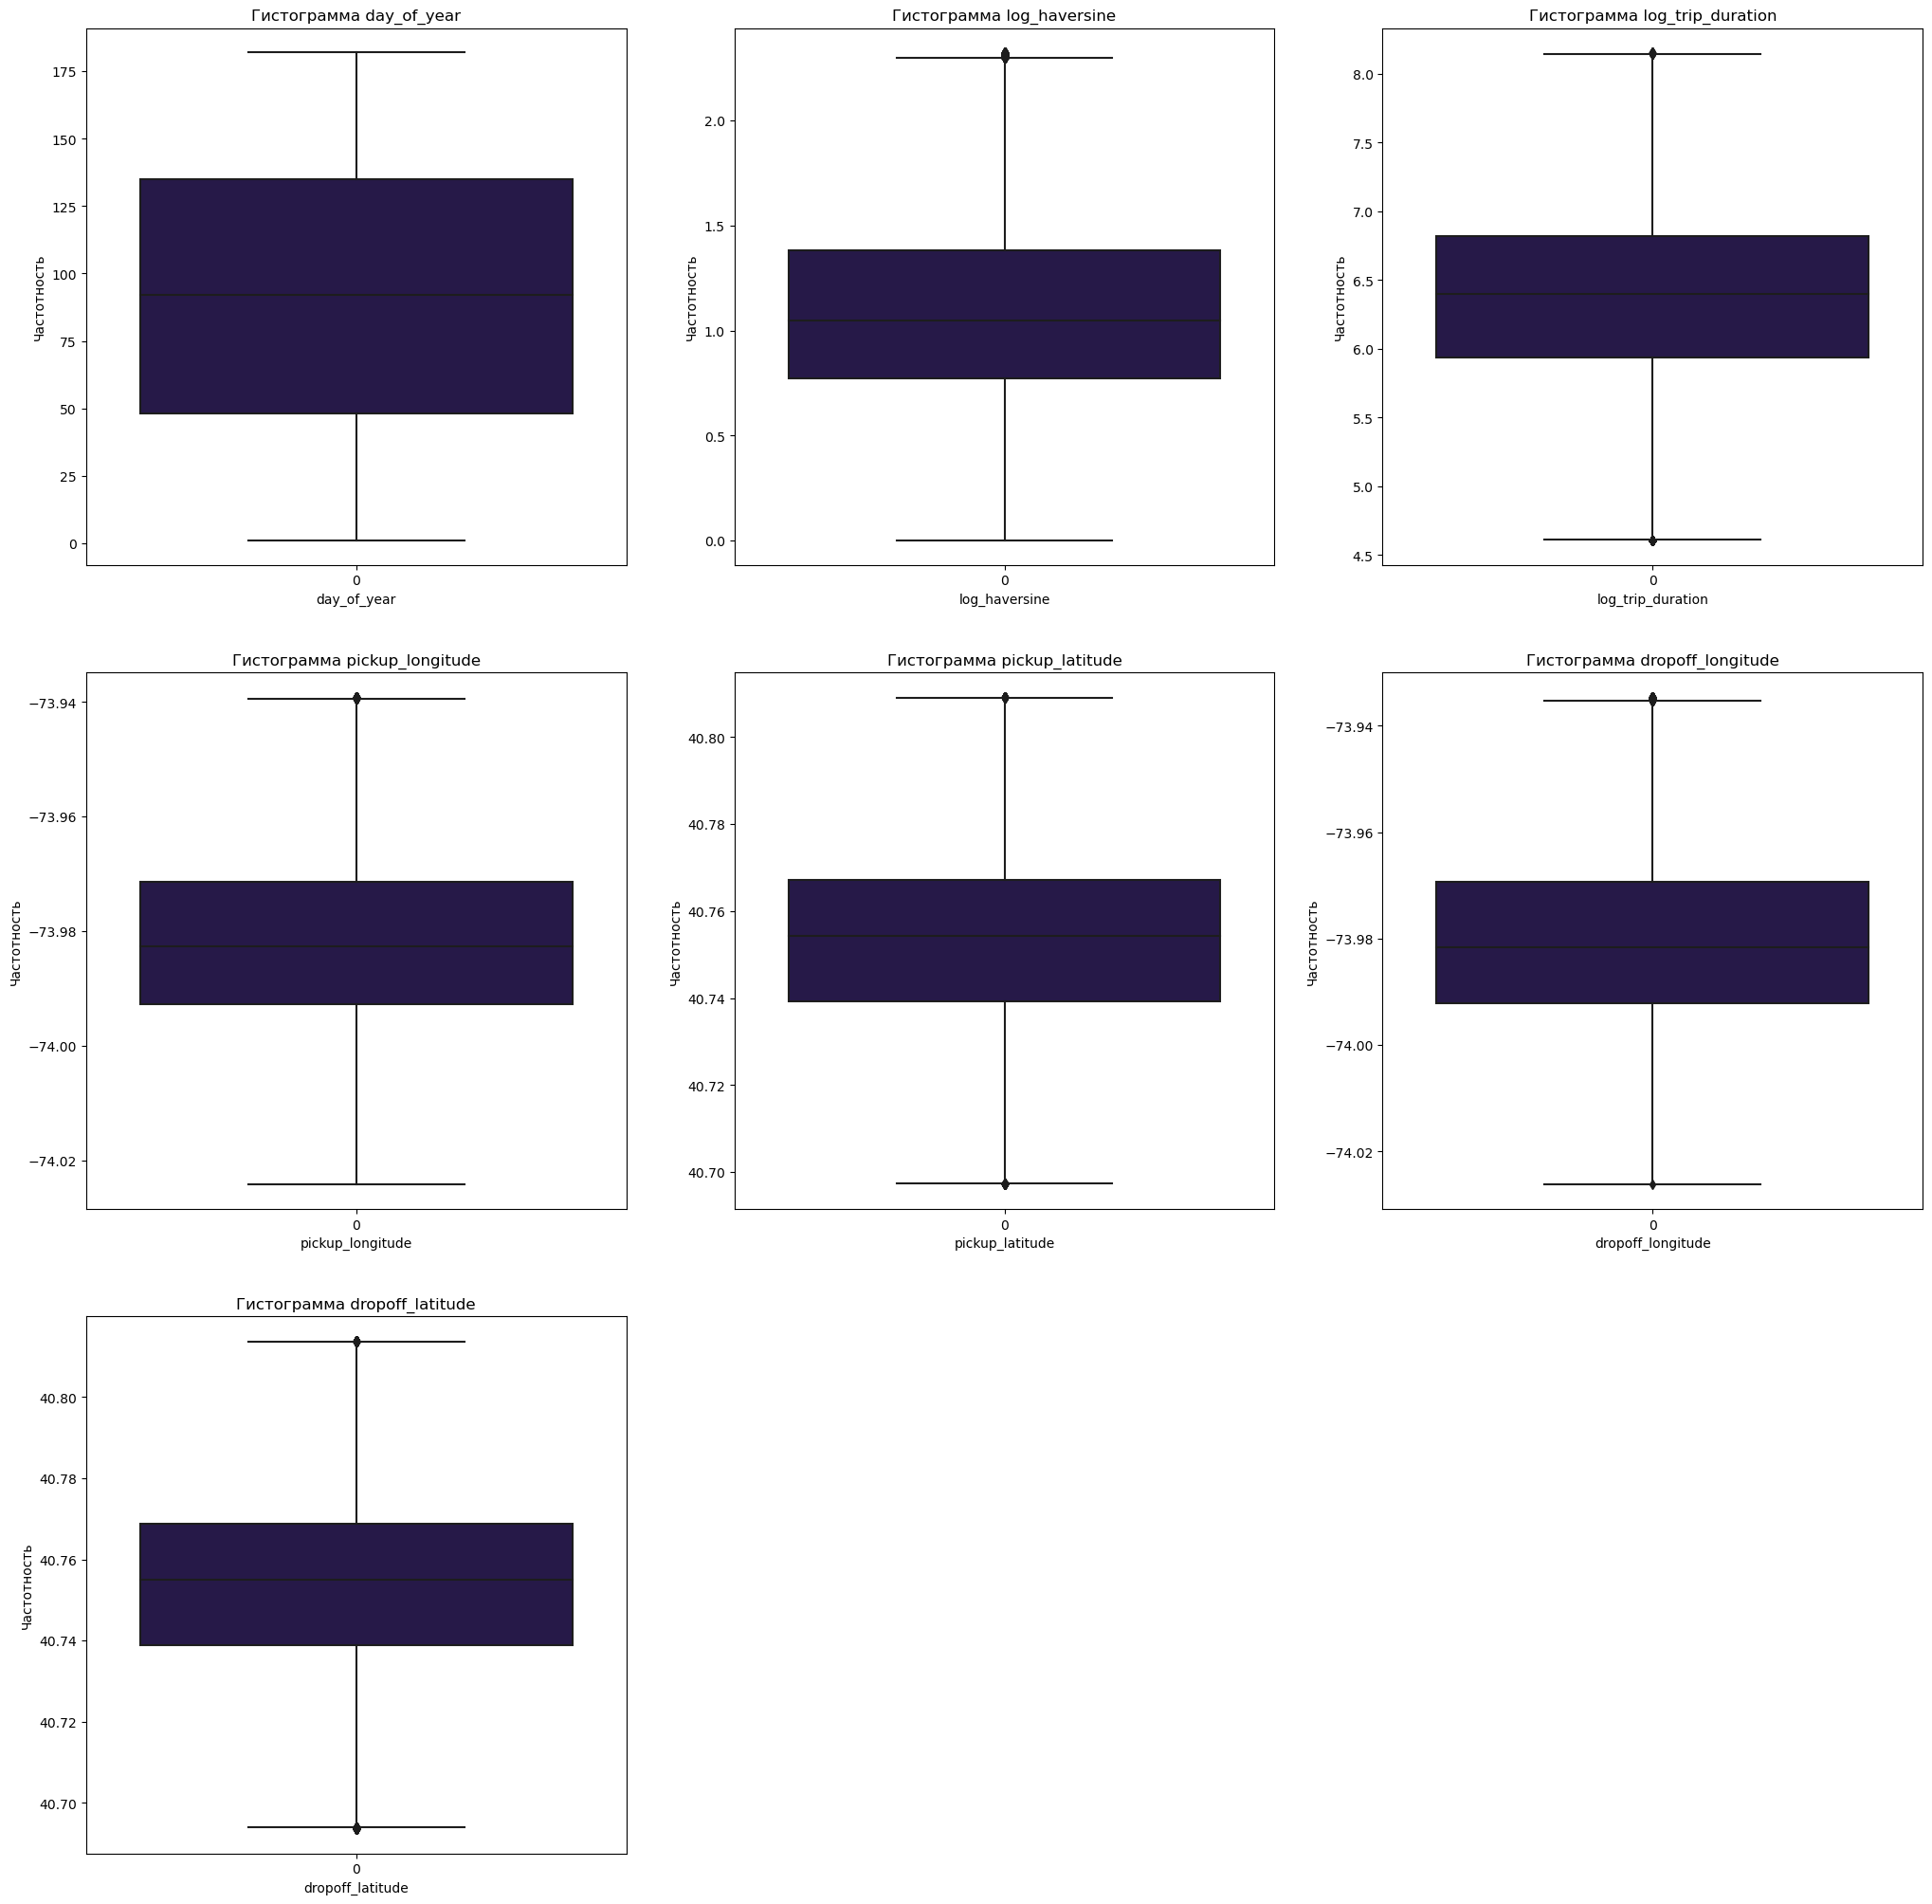

In [753]:
#Проверим чистоту данных на boxplot 
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(25, 25))
numeric_columns = ['day_of_year', 'log_haversine', 'log_trip_duration', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude' ]
for i, column in enumerate((numeric_columns)):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(df_train[column], color = color) 
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частотность')

Остальными выбросами можно пренебречь - они минимальные. Проверим, что мы не сильно потеряли в данных  

In [754]:
df_train.shape

(849358, 19)

In [755]:
train.shape[0] * 0.7

1021050.7999999999

In [756]:
train.shape[0] * 0.7 - df_train.shape[0]

171692.79999999993

В целом, это приемлемая потеря в данных, так как у модели все равно большая тренировочная выборка для обучения. 

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие).

In [757]:
#За редкую категорию будем принимать ту, % соотношение которой составляет менее 10% от тренировочных данных
#при этом я намеренно не трогаю 'deviance1', 'deviance2', 'airport_pickup', 'airport_dropoff', потому что они сами направлены на выявление выбросов
categorical_features = ['weekday', 'hour', 'month']
threshold = 0.01 * len(df_train)

for feature in categorical_features:
    value_counts = df_train[feature].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    
    df_train[feature] = df_train[feature].replace(rare_categories, 0)
for feature in categorical_features:
    print(f"'{feature}': {df_train[feature].nunique()}")

'weekday': 7
'hour': 22
'month': 6


In [758]:
df_train['hour'].unique()

array([ 9, 16, 17,  0, 14, 23, 13, 21, 20, 22, 18, 11, 10, 19, 12,  8, 15,
        1,  7,  3,  2,  6], dtype=int32)

Видно, что мы объединили 3 часа в 1. Остальные категории оказались значимы. 

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [759]:
cat_features = ['weekday', 'hour', 'month', 'deviance1', 'deviance2']
num_features = ['airport_pickup', 'airport_dropoff', 'heavy_traffic', 'day_of_year', 'log_haversine']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features) #мы же почистили колонку с часами, поэтому в тестовой выборке остались часы, которые мы убрали из тренировочной, что ломает код. 
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['airport_pickup',
                                                   'airport_dropoff',
                                                   'heavy_traffic',
                                                   'day_of_year',
                                                   'log_haversine']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['weekday', 'hour', 'month',
                                                   'deviance1',
                                                   'deviance2'])])),
                ('regressor', Ridge())])

In [760]:
y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))

rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

rmsle_test

0.07439331108658062

Печаль-печаль! RMLSE незначительно выросла после очистки от выбросов. Видимо, они действительно имели какой-то продуктовый смысл и бездумно вычищать их без дополнительного исследования не стоило. 

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [761]:
num_features_before = df_train.shape[1]
#просто прогоним кодирование еще раз
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(), cat_features)
    ])

X_transformed = preprocessor.fit_transform(df_train.drop(columns=['log_trip_duration']))

num_features_after = X_transformed.shape[1]

print(num_features_before, num_features_after)

19 44


Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [762]:
from sklearn.linear_model import Lasso
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features) #мы же почистили колонку с часами, поэтому в тестовой выборке остались часы, которые мы убрали из тренировочной, что ломает код. 
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['airport_pickup',
                                                   'airport_dropoff',
                                                   'heavy_traffic',
                                                   'day_of_year',
                                                   'log_haversine']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['weekday', 'hour', 'month',
                                                   'deviance1',
                                                   'deviance2'])])),
                ('regressor', Lasso())])

In [763]:
y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))

rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

rmsle_test

0.11315421367105297

Ridge регрессия показала себя лучше. 

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [764]:
X = df_train.drop(columns=['log_trip_duration'])
y = df_train['log_trip_duration']

X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [765]:
from sklearn.model_selection import GridSearchCV
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

param_grid_ridge = {'regressor__alpha': np.logspace(-4, 4, num=50)}
param_grid_lasso = {'regressor__alpha': np.logspace(-4, 4, num=50)}

ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

ridge_search = GridSearchCV(ridge_pipeline,
                             param_grid_ridge,
                             scoring='neg_mean_squared_log_error',
                             cv=5)

ridge_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['airport_pickup',
                                                                          'airport_dropoff',
                                                                          'heavy_traffic',
                                                                          'day_of_year',
                                                                          'log_haversine']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['weekday',
                                                                          'hour',
                                                                          'month',
                                                                          'deviance1',
                                                                          'deviance2'])])),
                                       ('regressor', Ridge())]),
             param_grid={'regressor__a...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])},
             scoring='neg_mean_squared_log_error')

In [766]:
y_pred_ridge = ridge_search.predict(X_val)

rmsle_ridge = np.sqrt(mean_squared_log_error(y_val , y_pred_ridge))

In [767]:
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

lasso_search = GridSearchCV(lasso_pipeline,
                             param_grid_lasso,
                             scoring='neg_mean_squared_log_error',
                             cv=5)

lasso_search.fit(X_train,y_train)

best_lasso_model = lasso_search.best_estimator_
lasso_val_score = best_lasso_model.score(X_val,y_val)


In [768]:
y_pred_lasso = lasso_search.predict(X_val)

rmsle_lasso = np.sqrt(mean_squared_log_error(y_val, y_pred_lasso))

In [769]:
best_model = ridge_search if ridge_search.best_score_ > lasso_search.best_score_ else lasso_search

y_pred_test = best_model.predict(df_test.drop(columns=['log_trip_duration']))
rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

print("RMSLE на тестовой выборке:", rmsle_test)


RMSLE на тестовой выборке: 0.07439361919571011


Сохраните наилучшее значение, как бенчмарк на будущее

In [770]:
best_rmsle = rmsle_test

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?

In [771]:
alphas = np.logspace(-4, 4, num=50)
zero_weights_count = []
rmsle_values = []
for alpha in alphas:
    lasso_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', Lasso(alpha=alpha))
    ])
    
    lasso_pipeline.fit(X_train, y_train)

    coef = lasso_pipeline.named_steps['regressor'].coef_
    zero_weights_count.append(np.sum(coef == 0))
    y_pred = lasso_pipeline.predict(df_test.drop(columns=['log_trip_duration']))
    rmsle = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'] , y_pred))
    rmsle_values.append(rmsle)


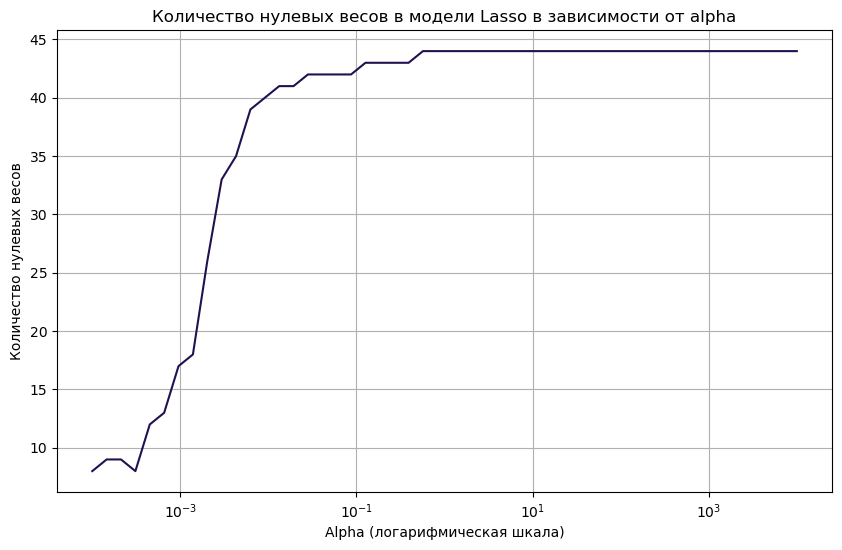

In [772]:
plt.figure(figsize=(10,6))
plt.plot(alphas, zero_weights_count)
plt.xscale('log')
plt.title('Количество нулевых весов в модели Lasso в зависимости от alpha')
plt.xlabel('Alpha (логарифмическая шкала)')
plt.ylabel('Количество нулевых весов')
plt.grid()
plt.show()

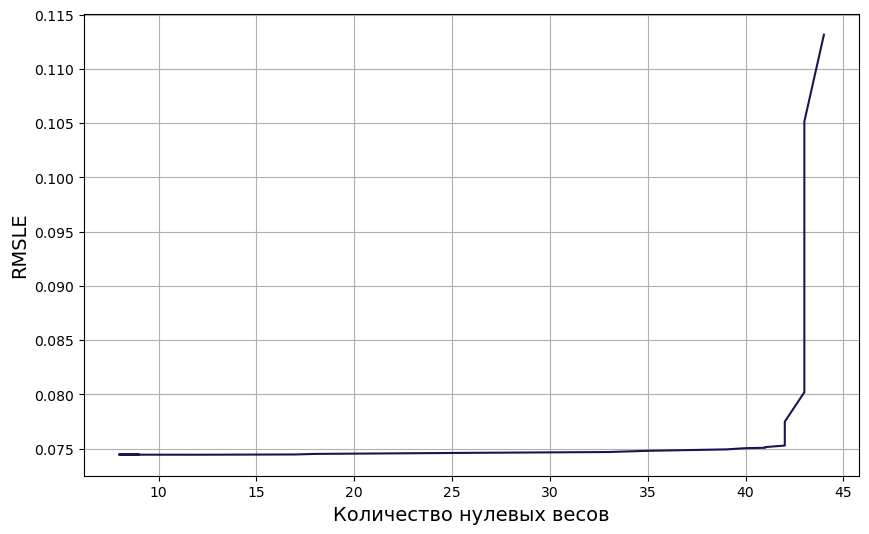

In [773]:
plt.figure(figsize=(10,6))
plt.plot(zero_weights_count, rmsle_values)
plt.xlabel('Количество нулевых весов', fontsize=14)
plt.ylabel('RMSLE', fontsize=14)
plt.grid()
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

**Ответ**: Данный признак полезен, потому что линейные модели предполагают линейность взаимосвязей признаков, что, однако, не отвечает реальности. Например, определенные пары ячеек могут иметь уникальные закономерности, которые не могут быть захвачены простыми линейными комбинациями отдельных признаков. Более того, линейные модели рассматривают признаки по отдельности: даже если модель имеет доступ к отдельным признакам "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка", она не сможет понять, что именно комбинация этих двух признаков является важной для предсказания. 

In [774]:
grid_transformer = MapGridTransformer()
df_cells = grid_transformer.transform(train)
train['pickup_cell'] = df_cells['pickup_cell']
train['dropoff_cell'] = df_cells['dropoff_cell']
train['cell_pair'] = train['pickup_cell'].astype(str) + '_' + train['dropoff_cell'].astype(str)
pair_counts = train['cell_pair'].value_counts().reset_index()
pair_counts.columns = ['cell_pair', 'count']
top_pairs = pair_counts.nlargest(100, 'count')
pair_mapping = {pair: i for i, pair in enumerate(top_pairs['cell_pair'])}

train['encoded_pair'] = train['cell_pair'].apply(lambda x: 1 if x in top_pairs else "0")


Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [775]:
categorical_features += ['encoded_pair']

In [776]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)

In [777]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])

y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))
rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

print(rmsle_test)


0.07243021225929257


RMSLE упал, что приятно:)

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

**Ответ**: Манхэттенское расстояние — это метрика, используемая для измерения расстояния между двумя точками в пространстве с прямоугольной сеткой. Его название связано с планировкой улицы Манхэттен в Нью-Йорке, где улицы расположены в виде прямоугольной сетки. 

В наших данных это полезный признак, потому что он приближает к реальности моделирование перемещений такси по улицам города, что может более точно предсказывать необходимое время поездки по городу. Не для нашей задачи это может быть полезно для метода k-ближайших соседей, так как это один из методов оценки близости данных. Помимо этого, данная метрика может быть полезна, если в данных есть выбросы - Манхэттенское расстояние менее чувствительно к ним по сравнению с Евклидовым, который возводит разность координат в квадрат. 



Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут).

In [778]:
train.columns

Index(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'log_trip_duration', 'dates', 'weekday', 'hour', 'month', 'day_of_year',
       'deviance1', 'deviance2', 'log_haversine', 'heavy_traffic',
       'airport_pickup', 'airport_dropoff', 'pickup_cell', 'dropoff_cell',
       'cell_pair', 'encoded_pair'],
      dtype='object')

In [779]:
train['manhattan_distance'] = abs(train['pickup_longitude'] - train['dropoff_longitude']) + abs(train['pickup_latitude'] - train['dropoff_latitude'])

In [780]:
train['log_manhattan_distance'] = np.log1p(train['manhattan_distance'])

In [781]:
correlation_manhattan = train['manhattan_distance'].corr(train['log_trip_duration'])
correlation_log_haversine = train['log_haversine'].corr(train['log_trip_duration'])
correlation_manhattan

0.5626670407200328

In [782]:
correlation_log_haversine

0.7498822373942491

Корреляция больше с параметром haverstine, чем с манхэттенским расстоянием. 

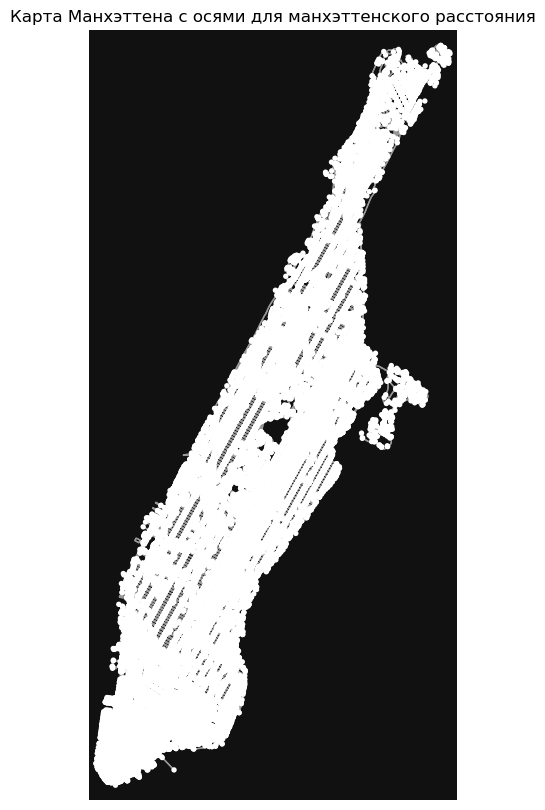

In [783]:
import osmnx as ox
G = ox.graph_from_place('Manhattan, New York, USA', network_type='walk')

fig, ax = ox.plot_graph(G, figsize=(10, 10), show=False, close=False)
ax.axhline(0, color='black', lw=0.5)
ax.axvline(0, color='black', lw=0.5)
ax.set_xlabel('Долгота')
ax.set_ylabel('Широта')
ax.set_title('Карта Манхэттена с осями для манхэттенского расстояния')

plt.show()

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [784]:
num_features += ['log_manhattan_distance']

In [785]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=42)

In [786]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])

y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))
rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

print(rmsle_test)


0.07123267152268693


Действительно, стало лучше. Это связано с тем, что в модель были добавлены признаки, которые позволяют учитывать скрытые закономерности, которые не были бы видны при использовании только исходных признаков. Например, определенные маршруты могут иметь характерные расстояния, которые влияют на время поездки.

**Задание 17 (бонус, 2 балла)**.

Разумеется, погружаться в feature engineering можно ещё очень долго. Ваша задача - придумать какие-то новые признаки, которые сделают модель ещё лучше!! За улучшение функционала ошибки на каждые 0.005 на тестовой выборке относительно `best_rmsle` будет даваться 0.5 бонусных балла. Всего за этот пункт можно получить до 2 бонусных баллов.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Какие могут быть идеи для вдохновения:

1. Трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения, по аналогии с квадратной сеткой  
> Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.    

2. Мы пока что никак не использовали историчность и взаимосвязь в данных, хотя информация о том, что было ранее в эти/похожие дни тоже может пригодиться. Попробуйте поискать соседей и/или построить агрегации, например, при помощи groupby, посчитайте какие-либо статистики в пределах какого-то окна (подберите всё это сами, постарайтесь, чтобы это было что-то разумное), и присоедините к основному датафрейму
> Важно: учтите, что разных вариантов агрегаций и статистик существует очень много. Не стесняйтесь выкидывать фичи, которые вам не нравятся (помните про свойство Lasso), используйте эффективные способы хранения данных ([wink](https://www.kaggle.com/code/demche/polars-memory-usage-optimization)-[wink](https://docs.scipy.org/doc/scipy/reference/sparse.html))

3. В конце концов можно использовать альтернативные способы преобразования данных. Например, использовать другой scaler, другую кодировку категориальных фичей, другие гиперпараметры и пр. Но помните, что на данный момент мы ограничены только `Ridge` и `Lasso`

In [787]:
train

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,dates,weekday,...,log_haversine,heavy_traffic,airport_pickup,airport_dropoff,pickup_cell,dropoff_cell,cell_pair,encoded_pair,manhattan_distance,log_manhattan_distance
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,455,6.122493,2016-03-14,Monday,...,0.915699,1,0,0,12,13,12_13,0,0.019859,0.019665
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,663,6.498282,2016-06-12,Sunday,...,1.031584,0,0,0,12,12,12_12,0,0.026478,0.026133
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,2124,7.661527,2016-01-19,Tuesday,...,1.999464,1,0,0,12,7,12_7,0,0.080158,0.077108
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,429,6.063785,2016-04-06,Wednesday,...,0.910473,1,0,0,12,7,12_7,0,0.015480,0.015361
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,435,6.077642,2016-03-26,Saturday,...,0.783257,1,0,0,17,17,17_17,0,0.010818,0.010760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,778,6.658011,2016-04-08,Friday,...,0.799793,1,0,0,12,12,12_12,0,0.018063,0.017901
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,655,6.486161,2016-01-10,Sunday,...,1.953004,0,0,0,12,18,12_18,0,0.079929,0.076896
1458641,id2304944,2016-04-22 06:57:41,-73.959129,40.768799,-74.004433,40.707371,764,6.639876,2016-04-22,Friday,...,2.177544,0,0,0,13,7,13_7,0,0.106731,0.101411
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,373,5.924256,2016-01-05,Tuesday,...,0.738390,1,0,0,12,12,12_12,0,0.015491,0.015373


In [788]:
#Добавим фичу с погодными условиями 
#Датасет брала отсюда: https://www.kaggle.com/datasets/danbraswell/new-york-city-weather-18692022

In [789]:
train.columns

Index(['id', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'log_trip_duration', 'dates', 'weekday', 'hour', 'month', 'day_of_year',
       'deviance1', 'deviance2', 'log_haversine', 'heavy_traffic',
       'airport_pickup', 'airport_dropoff', 'pickup_cell', 'dropoff_cell',
       'cell_pair', 'encoded_pair', 'manhattan_distance',
       'log_manhattan_distance'],
      dtype='object')

In [790]:
weather = pd.read_csv('NYC_Central_Park_weather_1869-2022.csv')

In [791]:
weather['dates'] = weather['DATE']

In [800]:
train['dates'] = pd.to_datetime(train['dates'])
weather['dates'] = pd.to_datetime(weather['dates'])

In [801]:
df = pd.merge(train, weather, on='dates')


In [805]:
df

,id,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,log_trip_duration,dates,weekday,...,cell_pair,encoded_pair,manhattan_distance,log_manhattan_distance,DATE,PRCP,SNOW,SNWD,TMIN,TMAX
0,id2875421,2016-03-14 17:24:55,-73.982155,40.767937,-73.964630,40.765602,455,6.122493,2016-03-14,Monday,...,12_13,0,0.019859,0.019665,2016-03-14,0.29,0.0,0.0,40.0,51.0
1,id2377394,2016-06-12 00:43:35,-73.980415,40.738564,-73.999481,40.731152,663,6.498282,2016-06-12,Sunday,...,12_12,0,0.026478,0.026133,2016-06-12,0.00,0.0,0.0,62.0,83.0
2,id3858529,2016-01-19 11:35:24,-73.979027,40.763939,-74.005333,40.710087,2124,7.661527,2016-01-19,Tuesday,...,12_7,0,0.080158,0.077108,2016-01-19,0.00,0.0,0.0,16.0,28.0
3,id3504673,2016-04-06 19:32:31,-74.010040,40.719971,-74.012268,40.706718,429,6.063785,2016-04-06,Wednesday,...,12_7,0,0.015480,0.015361,2016-04-06,0.00,0.0,0.0,30.0,48.0
4,id2181028,2016-03-26 13:30:55,-73.973053,40.793209,-73.972923,40.782520,435,6.077642,2016-03-26,Saturday,...,17_17,0,0.010818,0.010760,2016-03-26,0.00,0.0,0.0,38.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2016-04-08 13:31:04,-73.982201,40.745522,-73.994911,40.740170,778,6.658011,2016-04-08,Friday,...,12_12,0,0.018063,0.017901,2016-04-08,0.01,0.0,0.0,40.0,50.0
1458640,id1049543,2016-01-10 07:35:15,-74.000946,40.747379,-73.970184,40.796547,655,6.486161,2016-01-10,Sunday,...,12_18,0,0.079929,0.076896,2016-01-10,1.80,0.0,0.0,40.0,59.0
1458641,id2304944,2016-04-22 06:57:41,-73.959129,40.768799,-74.004433,40.707371,764,6.639876,2016-04-22,Friday,...,13_7,0,0.106731,0.101411,2016-04-22,0.00,0.0,0.0,62.0,79.0
1458642,id2714485,2016-01-05 15:56:26,-73.982079,40.749062,-73.974632,40.757107,373,5.924256,2016-01-05,Tuesday,...,12_12,0,0.015491,0.015373,2016-01-05,0.00,0.0,0.0,11.0,29.0


In [806]:
df = df.drop(columns = 'DATE')

In [811]:
num_features += ['SNOW', 'TMIN' , 'PRCP', 'TMAX']

In [808]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

In [814]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

model.fit(df_train.drop(columns=['log_trip_duration']), df_train['log_trip_duration'])

y_pred_test = model.predict(df_test.drop(columns=['log_trip_duration']))
rmsle_test = np.sqrt(mean_squared_log_error(df_test['log_trip_duration'], y_pred_test))

print(rmsle_test)


0.07122241789262176


Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.